## Notebook structure

- Summary statistics
- Data Cleaning
    - remove duplicates rows
    - remove columns where all values are same
    - remove irrelevant columns 
- Data preprocessing
    - Missing value handling
    - Filtering high value customers
        - Delete columns of ninth month
    - Derive target variable : churn
 - EDA
    - Univariate analysis
    - Bivarriate analysis
    - Correlations and Intution from EDA
- Derive new features
- Correlation table
- Preparing data for Modelling
    - split into train and test set
    - Handle High Class Imbalance using SMOTE
    - handle class imbalance using stratify
    - scale data
    - Use PCA for dimensionality reduction
- Modelling    
    - Create Logistic Regression and predict on test set
    - Create Decision Trees and predict on test set
        - Use HPT to get best parameters
    - Create Random Forests and predict on test set
        - Use HPT to get best parameters
    - Choose best model based on Various Metrics
- Feature importances
    - Plot the various important features in a bar plot
- Provide Observations and Business Suggestions


In [1]:
#Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.metrics import classification_report
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',300)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#data Summary
df = pd.read_csv('telecom_churn_data.csv')
df.head(20)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
1      7001865778        109             0.0             0.0             0.0   
2      7001625959        109             0.0             0.0             0.0   
3      7001204172        109             0.0             0.0             0.0   
4      7000142493        109             0.0             0.0             0.0   
5      7000286308        109             0.0             0.0             0.0   
6      7001051193        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
9      7001864400        109             0.0             0.0             0.0   
10     7000471350        109             0.0             0.0             0.0   
11     7002006969        109             0.0             0.0             0.0   
12     7001419799        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
14     7001654241        109             0.0             0.0             0.0   
15     7002070365        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   
18     7001678155        109             0.0             0.0             0.0   
19     7001754084        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
1             6/30/2014            7/31/2014            8/31/2014   
2             6/30/2014            7/31/2014            8/31/2014   
3             6/30/2014            7/31/2014            8/31/2014   
4             6/30/2014            7/31/2014            8/31/2014   
5             6/30/2014            7/31/2014            8/31/2014   
6             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
9             6/30/2014            7/31/2014            8/31/2014   
10            6/30/2014            7/31/2014            8/31/2014   
11            6/30/2014            7/31/2014            8/31/2014   
12            6/30/2014            7/31/2014            8/31/2014   
13            6/30/2014            7/31/2014            8/31/2014   
14            6/30/2014            7/31/2014            8/31/2014   
15            6/30/2014            7/31/2014            8/31/2014   
16            6/30/2014            7/31/2014            8/31/2014   
17            6/30/2014            7/31/2014            8/31/2014   
18            6/30/2014            7/31/2014            8/31/2014   
19            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0             9/30/2014   197.385   214.816   213.803   21.100          NaN   
1             9/30/2014    34.047   355.074   268.321   86.285        24.11   
2             9/30/2014   167.690   189.058   210.226  290.714        11.54   
3             9/30/2014   221.338   251.102   508.054  389.500        99.91   
4             9/30/2014   261.636   309.876   238.174  163.426        50.31   
5             9/30/2014    50.258    58.810    83.386  170.826        50.16   
6             9/30/2014   429.023   190.704   255.114  114.751        71.03   
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
9             9/30/2014   119.518   247.435   170.231  160.042        33.89   
10  

In [3]:
df.shape

(99999, 226)

In [4]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

### Drop Duplicate Rows

In [5]:
df[df.duplicated()]

Empty DataFrame
Columns: [mobile_number, circle_id, loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, last_date_of_month_6, last_date_of_month_7, last_date_of_month_8, last_date_of_month_9, arpu_6, arpu_7, arpu_8, arpu_9, onnet_mou_6, onnet_mou_7, onnet_mou_8, onnet_mou_9, offnet_mou_6, offnet_mou_7, offnet_mou_8, offnet_mou_9, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, roam_ic_mou_9, roam_og_mou_6, roam_og_mou_7, roam_og_mou_8, roam_og_mou_9, loc_og_t2t_mou_6, loc_og_t2t_mou_7, loc_og_t2t_mou_8, loc_og_t2t_mou_9, loc_og_t2m_mou_6, loc_og_t2m_mou_7, loc_og_t2m_mou_8, loc_og_t2m_mou_9, loc_og_t2f_mou_6, loc_og_t2f_mou_7, loc_og_t2f_mou_8, loc_og_t2f_mou_9, loc_og_t2c_mou_6, loc_og_t2c_mou_7, loc_og_t2c_mou_8, loc_og_t2c_mou_9, loc_og_mou_6, loc_og_mou_7, loc_og_mou_8, loc_og_mou_9, std_og_t2t_mou_6, std_og_t2t_mou_7, std_og_t2t_mou_8, std_og_t2t_mou_9, std_og_t2m_mou_6, std_og_t2m_mou_7, std_og_t2m_mou_8, std_og_t2m_mou_9, std_og_t2f_mou_6, std_og_t2f_mou_7, std_og_t2f_mou_8, std_og_t2f_mou_9, std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8, std_og_t2c_mou_9, std_og_mou_6, std_og_mou_7, std_og_mou_8, std_og_mou_9, isd_og_mou_6, isd_og_mou_7, isd_og_mou_8, isd_og_mou_9, spl_og_mou_6, spl_og_mou_7, spl_og_mou_8, spl_og_mou_9, og_others_6, og_others_7, og_others_8, og_others_9, total_og_mou_6, total_og_mou_7, total_og_mou_8, total_og_mou_9, loc_ic_t2t_mou_6, loc_ic_t2t_mou_7, loc_ic_t2t_mou_8, loc_ic_t2t_mou_9, loc_ic_t2m_mou_6, loc_ic_t2m_mou_7, loc_ic_t2m_mou_8, loc_ic_t2m_mou_9, loc_ic_t2f_mou_6, loc_ic_t2f_mou_7, loc_ic_t2f_mou_8, loc_ic_t2f_mou_9, loc_ic_mou_6, loc_ic_mou_7, loc_ic_mou_8, ...]
Index: []

# Handle and Impute Missing recharge values

In [6]:
#check missing values %
(df.isnull().sum() / len(df)) * 100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [7]:
rech_zero_values = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [8]:
# impute missing values with 0
df[rech_zero_values] = df[rech_zero_values].apply(lambda x: x.fillna(0))

In [9]:
(df.isnull().sum() / len(df)) * 100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

# Derive New Features

In [10]:
df['av_rech_amt_data_6']

0        252.0
1          0.0
2          0.0
3          0.0
4         56.0
         ...  
99994      0.0
99995      0.0
99996     39.0
99997    583.0
99998    154.0
Name: av_rech_amt_data_6, Length: 99999, dtype: float64

In [11]:
df['total_rech_data_7']

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
99994    0.0
99995    0.0
99996    0.0
99997    2.0
99998    0.0
Name: total_rech_data_7, Length: 99999, dtype: float64

## We can derive a new feature called Total Data Recharge by taking product of av_rech_amt_data_x and total_rech_data_x

In [12]:
#derive new features
df['total_rech_data_amt_6'] = df['av_rech_amt_data_6'] * df['total_rech_data_6']
df['total_rech_data_amt_7'] = df['av_rech_amt_data_7'] * df['total_rech_data_7']
df['total_rech_data_amt_8'] = df['av_rech_amt_data_8'] * df['total_rech_data_8']
df['total_rech_data_amt_9'] = df['av_rech_amt_data_9'] * df['total_rech_data_9']


In [13]:
 df['total_rech_data_amt_6']

0         252.0
1           0.0
2           0.0
3           0.0
4          56.0
          ...  
99994       0.0
99995       0.0
99996      78.0
99997    1749.0
99998     154.0
Name: total_rech_data_amt_6, Length: 99999, dtype: float64

## High Value Filter

In [14]:
df['total_reach_and_data_amt_6'] = df['total_rech_amt_6'] + df['total_rech_data_amt_6'] 
df['total_reach_and_data_amt_7'] = df['total_rech_amt_7'] + df['total_rech_data_amt_7'] 

In [15]:
df['avg_amt_6_and_7'] = (df['total_reach_and_data_amt_6'] + df['total_reach_and_data_amt_7'])/2

In [16]:
#get 70 % percentile
df_seventy = df['avg_amt_6_and_7'].quantile(0.7)
df_seventy

478.0

## Now we have identified the 70th Percentile , Lets Filter out the data for High value customers

In [17]:
# Filter based on 70 percentile
df_high_value = df.loc[df['avg_amt_6_and_7'] >= df_seventy]

In [18]:
df_high_value.shape

(30001, 233)

## we can drop the columns which we created for High value Customers

In [19]:
df_high_value = df_high_value.drop(['total_reach_and_data_amt_6','total_reach_and_data_amt_7','avg_amt_6_and_7'],axis=1)

In [20]:
df_high_value.shape

(30001, 230)

# Derive the Churn and Not Churn based on condition

In [21]:
df_high_value['churn'] = np.where(df_high_value[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)

In [22]:
df_high_value.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   
23            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0             9/30/2014   197.385   214.816   213.803   21.100          NaN   
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
21            9/30/2014   514.453   597.753   637.760  578.596       102.41   
23            9/30/2014    74.350   193.897   366.966  811.480        48.96   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0           NaN         0.00          NaN           NaN           NaN   
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
21       132.11        85.14       161.63        757.93        896.68   
23        50.66        33.58        15.74         85.41         89.36   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00           NaN            NaN            NaN           0.00   
7         325.91           NaN          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
21        983.39        869.89           0.00           0.00           0.00   
23        205.89        111.88           0.00           0.00           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0             NaN            NaN            NaN           0.00            NaN   
7             NaN          23.74          12.59          38.06            NaN   
8             0.0           0.00           0.00           0.00            0.0   
21            0.0           0.00           0.00           0.00            0.0   
23            0.0           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0                NaN               NaN              0.00               NaN   
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0                NaN               NaN              0.00               NaN   
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00    

## Since we predicted the Churn wer can delete the columns belonging to the night month '_9'

In [23]:
for i in df_high_value.columns:
    if '_9' in i:
        df_high_value.drop(i,axis=1,inplace=True)
     

In [24]:
df_high_value.shape

(30001, 176)

In [25]:
df_high_value['churn'].value_counts()/len(df_high_value)*100

0    91.863605
1     8.136395
Name: churn, dtype: float64

<AxesSubplot:xlabel='churn', ylabel='count'>

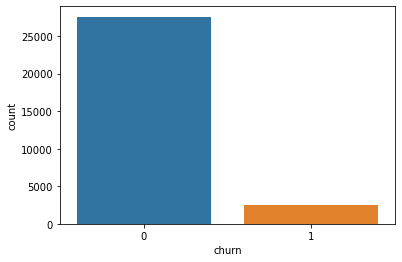

In [26]:
sns.countplot(x='churn', data=df_high_value)

## Dropping the values which doesnt have more variance

In [27]:
#Drop Variance
for i in df_high_value.columns:
    if df_high_value[i].nunique() == 1:
        
        df_high_value.drop(i,axis=1,inplace = True)

In [28]:
df_high_value.shape

(30001, 163)

In [29]:
df_high_value.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803          NaN          NaN   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00           NaN           NaN          0.00            NaN   
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
21        85.14        757.93        896.68        983.39           0.00   
23        33.58         85.41         89.36        205.89           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0             NaN           0.00            NaN            NaN           0.00   
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0                NaN              0.00               NaN               NaN   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               NaN               NaN              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0            NaN           NaN          0.00               NaN   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0                NaN              0.00               NaN               NaN   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00               NaN               NaN              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21          

In [30]:
# lets check for columns that can be changed to integers, floats or date types
cols_types = df_high_value.select_dtypes(include=['object'])
print(cols_types.iloc[0])

# observation : all the columns below can be converted to date type

date_of_last_rech_6         6/21/2014
date_of_last_rech_7         7/16/2014
date_of_last_rech_8          8/8/2014
date_of_last_rech_data_6    6/21/2014
date_of_last_rech_data_7    7/16/2014
date_of_last_rech_data_8     8/8/2014
Name: 0, dtype: object


In [31]:
# convert to datetime
for col in cols_types.columns:
    df_high_value[col] = pd.to_datetime(df_high_value[col])

df_high_value.shape

(30001, 163)

# Handling Missing Values

In [32]:
df_high_value.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 163 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    mobile_number             int64         
 1    arpu_6                    float64       
 2    arpu_7                    float64       
 3    arpu_8                    float64       
 4    onnet_mou_6               float64       
 5    onnet_mou_7               float64       
 6    onnet_mou_8               float64       
 7    offnet_mou_6              float64       
 8    offnet_mou_7              float64       
 9    offnet_mou_8              float64       
 10   roam_ic_mou_6             float64       
 11   roam_ic_mou_7             float64       
 12   roam_ic_mou_8             float64       
 13   roam_og_mou_6             float64       
 14   roam_og_mou_7             float64       
 15   roam_og_mou_8             float64       
 16   loc_og_t2t_mou_6          float64     

In [33]:
df_high_value.head(5)

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803          NaN          NaN   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00           NaN           NaN          0.00            NaN   
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
21        85.14        757.93        896.68        983.39           0.00   
23        33.58         85.41         89.36        205.89           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0             NaN           0.00            NaN            NaN           0.00   
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0                NaN              0.00               NaN               NaN   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               NaN               NaN              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0            NaN           NaN          0.00               NaN   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0                NaN              0.00               NaN               NaN   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00               NaN               NaN              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21          

# Drop missing values 

In [34]:
#Set missing values 0.7
initial_cols = df_high_value.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(df_high_value.apply(lambda column: True if \
               column.isnull().sum()/ df_high_value.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':df_high_value.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

features  include
0               mobile_number     True
1                      arpu_6     True
2                      arpu_7     True
3                      arpu_8     True
4                 onnet_mou_6     True
5                 onnet_mou_7     True
6                 onnet_mou_8     True
7                offnet_mou_6     True
8                offnet_mou_7     True
9                offnet_mou_8     True
10              roam_ic_mou_6     True
11              roam_ic_mou_7     True
12              roam_ic_mou_8     True
13              roam_og_mou_6     True
14              roam_og_mou_7     True
15              roam_og_mou_8     True
16           loc_og_t2t_mou_6     True
17           loc_og_t2t_mou_7     True
18           loc_og_t2t_mou_8     True
19           loc_og_t2m_mou_6     True
20           loc_og_t2m_mou_7     True
21           loc_og_t2m_mou_8     True
22           loc_og_t2f_mou_6     True
23           loc_og_t2f_mou_7     True
24           loc_og_t2f_mou_8     True
25           loc_og_t2c_mou_6     True
26           loc_og_t2c_mou_7     True
27           loc_og_t2c_mou_8     True
28               loc_og_mou_6     True
29               loc_og_mou_7     True
30               loc_og_mou_8     True
31           std_og_t2t_mou_6     True
32           std_og_t2t_mou_7     True
33           std_og_t2t_mou_8     True
34           std_og_t2m_mou_6     True
35           std_og_t2m_mou_7     True
36           std_og_t2m_mou_8     True
37           std_og_t2f_mou_6     True
38           std_og_t2f_mou_7     True
39           std_og_t2f_mou_8     True
40               std_og_mou_6     True
41               std_og_mou_7     True
42               std_og_mou_8     True
43               isd_og_mou_6     True
44               isd_og_mou_7     True
45               isd_og_mou_8     True
46               spl_og_mou_6     True
47               spl_og_mou_7     True
48               spl_og_mou_8     True
49                og_others_6     True
50                og_others_7     True
51                og_others_8     True
52             total_og_mou_6     True
53             total_og_mou_7     True
54             total_og_mou_8     True
55           loc_ic_t2t_mou_6     True
56           loc_ic_t2t_mou_7     True
57           loc_ic_t2t_mou_8     True
58           loc_ic_t2m_mou_6     True
59           loc_ic_t2m_mou_7     True
60           loc_ic_t2m_mou_8     True
61           loc_ic_t2f_mou_6     True
62           loc_ic_t2f_mou_7     True
63           loc_ic_t2f_mou_8     True
64               loc_ic_mou_6     True
65               loc_ic_mou_7     True
66               loc_ic_mou_8     True
67           std_ic_t2t_mou_6     True
68           std_ic_t2t_mou_7     True
69           std_ic_t2t_mou_8     True
70           std_ic_t2m_mou_6     True
71           std_ic_t2m_mou_7     True
72           std_ic_t2m_mou_8     True
73           std_ic_t2f_mou_6     True
74           std_ic_t2f_mou_7     True
75           std_ic_t2f_mou_8     True
76               std_ic_mou_6     True
77               std_ic_mou_7     True
78               std_ic_mou_8     True
79             total_ic_mou_6     True
80             total_ic_mou_7     True
81             total_ic_mou_8     True
82               spl_ic_mou_6     True
83               spl_ic_mou_7     True
84               spl_ic_mou_8     True
85               isd_ic_mou_6     True
86               isd_ic_mou_7     True
87               isd_ic_mou_8     True
88                ic_others_6     True
89                ic_others_7     True
90                ic_others_8     True
91           total_rech_num_6     True
92           total_rech_num_7     True
93           total_rech_num_8     True
94           total_rech_amt_6     True
95           total_rech_amt_7     True
96           total_rech_amt_8     True
97             max_rech_amt_6     True
98             max_rech_amt_7     True
99             max_rech_amt_8     True
100       date_of_last_rech_6     True
101       date_of_last_rech_7     True
102 

In [35]:
drop_missing.describe()

features include
count           163     163
unique          163       1
top     onnet_mou_7    True
freq              1     163

# We dont have any columns with more than 70% missing data , we can go ahead

In [36]:
# # Drop the Nan Values
# for i in df_high_value.columns:
#     if df_high_value.dtypes[i] != np.object:
# #         df_high_value = df_high_value[~np.isnan(df_high_value[i])]

In [37]:
(df_high_value.isnull().sum() / len(df)) * 100

mobile_number                0.000000
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  0.545005
onnet_mou_7                  0.537005
onnet_mou_8                  1.174012
offnet_mou_6                 0.545005
offnet_mou_7                 0.537005
offnet_mou_8                 1.174012
roam_ic_mou_6                0.545005
roam_ic_mou_7                0.537005
roam_ic_mou_8                1.174012
roam_og_mou_6                0.545005
roam_og_mou_7                0.537005
roam_og_mou_8                1.174012
loc_og_t2t_mou_6             0.545005
loc_og_t2t_mou_7             0.537005
loc_og_t2t_mou_8             1.174012
loc_og_t2m_mou_6             0.545005
loc_og_t2m_mou_7             0.537005
loc_og_t2m_mou_8             1.174012
loc_og_t2f_mou_6             0.545005
loc_og_t2f_mou_7             0.537005
loc_og_t2f_mou_8             1.174012
loc_og_t2c_mou_6             0.545005
loc_og_t2c_m

In [38]:
df_high_value.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803          NaN          NaN   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00           NaN           NaN          0.00            NaN   
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
21        85.14        757.93        896.68        983.39           0.00   
23        33.58         85.41         89.36        205.89           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0             NaN           0.00            NaN            NaN           0.00   
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0                NaN              0.00               NaN               NaN   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               NaN               NaN              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0            NaN           NaN          0.00               NaN   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0                NaN              0.00               NaN               NaN   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00               NaN               NaN              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21          

In [39]:
df_high_value.shape

(30001, 163)

In [40]:
df_high_value = df_high_value[~np.isnan(df_high_value['onnet_mou_6'])]
df_high_value = df_high_value[~np.isnan(df_high_value['onnet_mou_7'])]
df_high_value = df_high_value[~np.isnan(df_high_value['onnet_mou_8'])]
df_high_value = df_high_value[~np.isnan(df_high_value['offnet_mou_6'])]
df_high_value = df_high_value[~np.isnan(df_high_value['offnet_mou_7'])]
df_high_value = df_high_value[~np.isnan(df_high_value['offnet_mou_8'])]
df_high_value = df_high_value[~np.isnan(df_high_value['roam_ic_mou_6'])]
df_high_value = df_high_value[~np.isnan(df_high_value['roam_ic_mou_7'])]
df_high_value = df_high_value[~np.isnan(df_high_value['roam_ic_mou_8'])]
df_high_value = df_high_value[~np.isnan(df_high_value['roam_og_mou_6'])]
df_high_value = df_high_value[~np.isnan(df_high_value['roam_og_mou_7'])]
df_high_value = df_high_value[~np.isnan(df_high_value['roam_og_mou_8'])]
df_high_value = df_high_value[~np.isnan(df_high_value['loc_og_t2c_mou_6'])]
df_high_value = df_high_value[~np.isnan(df_high_value['loc_og_t2c_mou_7'])]
df_high_value = df_high_value[~np.isnan(df_high_value['loc_og_t2c_mou_8'])]
df_high_value = df_high_value[~np.isnan(df_high_value['loc_og_mou_6'])]
df_high_value = df_high_value[~np.isnan(df_high_value['loc_og_mou_7'])]
df_high_value = df_high_value[~np.isnan(df_high_value['loc_og_mou_8'])]
df_high_value = df_high_value[~np.isnan(df_high_value['std_og_t2f_mou_6'])]
df_high_value = df_high_value[~np.isnan(df_high_value['std_og_t2f_mou_7'])]
df_high_value = df_high_value[~np.isnan(df_high_value['std_og_t2f_mou_8'])]
df_high_value = df_high_value[~np.isnan(df_high_value['std_og_mou_6'])]
df_high_value = df_high_value[~np.isnan(df_high_value['std_og_mou_7'])]
df_high_value = df_high_value[~np.isnan(df_high_value['std_og_mou_8'])]
df_high_value = df_high_value[~np.isnan(df_high_value['isd_og_mou_6'])]
df_high_value = df_high_value[~np.isnan(df_high_value['isd_og_mou_7'])]
df_high_value = df_high_value[~np.isnan(df_high_value['isd_og_mou_8'])]
df_high_value = df_high_value[~np.isnan(df_high_value['spl_og_mou_6'])]
df_high_value = df_high_value[~np.isnan(df_high_value['spl_og_mou_7'])]
df_high_value = df_high_value[~np.isnan(df_high_value['spl_og_mou_8'])]
df_high_value = df_high_value[~np.isnan(df_high_value['og_others_6'])]
df_high_value = df_high_value[~np.isnan(df_high_value['og_others_7'])]
df_high_value = df_high_value[~np.isnan(df_high_value['og_others_8'])]
df_high_value = df_high_value[~np.isnan(df_high_value['loc_ic_mou_6'])]
df_high_value = df_high_value[~np.isnan(df_high_value['loc_ic_mou_7'])]
df_high_value = df_high_value[~np.isnan(df_high_value['loc_ic_mou_8'])]
df_high_value = df_high_value[~np.isnan(df_high_value['std_ic_t2t_mou_6'])]
df_high_value = df_high_value[~np.isnan(df_high_value['std_ic_t2t_mou_7'])]
df_high_value = df_high_value[~np.isnan(df_high_value['std_ic_t2t_mou_8'])]
df_high_value = df_high_value[~np.isnan(df_high_value['std_ic_t2f_mou_6'])]
df_high_value = df_high_value[~np.isnan(df_high_value['std_ic_t2f_mou_7'])]
df_high_value = df_high_value[~np.isnan(df_high_value['std_ic_t2f_mou_8'])]
df_high_value = df_high_value[~np.isnan(df_high_value['std_ic_mou_6'])]
df_high_value = df_high_value[~np.isnan(df_high_value['std_ic_mou_7'])]
df_high_value = df_high_value[~np.isnan(df_high_value['std_ic_mou_8'])]
df_high_value = df_high_value[~np.isnan(df_high_value['spl_ic_mou_6'])]
df_high_value = df_high_value[~np.isnan(df_high_value['spl_ic_mou_7'])]
df_high_value = df_high_value[~np.isnan(df_high_value['spl_ic_mou_8'])]
df_high_value = df_high_value[~np.isnan(df_high_value['isd_ic_mou_6'])]
df_high_value = df_high_value[~np.isnan(df_high_value['isd_ic_mou_7'])]
df_high_value = df_high_value[~np.isnan(df_high_value['isd_ic_mou_8'])]
df_high_value = df_high_value[~np.isnan(df_high_value['ic_others_6'])]
df_high_value = df_high_value[~np.isnan(df_high_value['ic_others_7'])]
df_high_value = df_high_value[~np.isnan(df_high_value['ic_others_8'])]

In [41]:
df_high_value.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   
33     7000149764   977.020  2362.833   409.230         0.00         0.00   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
21        85.14        757.93        896.68        983.39           0.00   
23        33.58         85.41         89.36        205.89           0.00   
33         0.00          0.00          0.00          0.00           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00           0.00   
33           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   
33              0.00              0.00              0.00              0.00   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   
33              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   
33              0.00               0.0               0.0              0.56   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   
33          0.00          0.00          0.00              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   
33              0.00              0.00              0.00              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00              0.00              0.00   
23          

In [42]:
df_high_value.shape

(28504, 163)

In [43]:
(df.isnull().sum() / len(df)) * 100

mobile_number                  0.000000
circle_id                      0.000000
loc_og_t2o_mou                 1.018010
std_og_t2o_mou                 1.018010
loc_ic_t2o_mou                 1.018010
last_date_of_month_6           0.000000
last_date_of_month_7           0.601006
last_date_of_month_8           1.100011
last_date_of_month_9           1.659017
arpu_6                         0.000000
arpu_7                         0.000000
arpu_8                         0.000000
arpu_9                         0.000000
onnet_mou_6                    3.937039
onnet_mou_7                    3.859039
onnet_mou_8                    5.378054
onnet_mou_9                    7.745077
offnet_mou_6                   3.937039
offnet_mou_7                   3.859039
offnet_mou_8                   5.378054
offnet_mou_9                   7.745077
roam_ic_mou_6                  3.937039
roam_ic_mou_7                  3.859039
roam_ic_mou_8                  5.378054
roam_ic_mou_9                  7.745077


In [44]:
plt.style.use('default')

In [45]:
# Create utility methods for EDA

def uni(col):
    '''
    creates plot for univariate analysis
        distplot for numerical
        countplot for categorical
    '''
    if 'int' in str(col.dtype) or 'float' in str(col.dtype):
        sns.distplot(col, kde=False)
    elif 'int' in str(col.dtype):
        sns.countplot(col)
    else:
        raise Exception("Unhandled datatype : {}".format(col.dtype))
        
def get_col(df, col_str):
    '''
    returns column names of df having the stringcol_str
    '''
    return np.array([col for col in df.columns if col_str in col])

### Univariate analysis

1. aon
Most of the users in the network are less than 1000 - 1500 days, i.e 3 -4 years

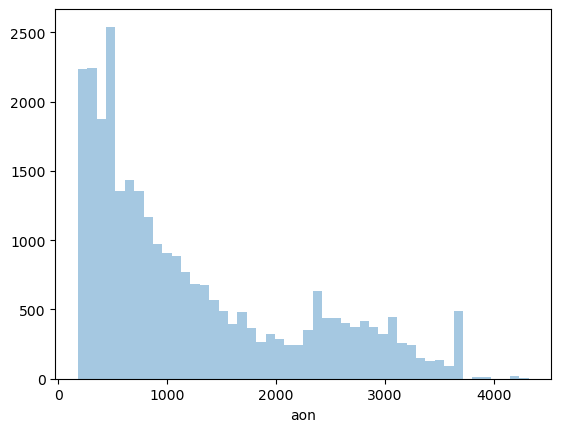

In [46]:
uni(df_high_value.aon)

**2. arpu**

ARPU data is right skewed, this shows presence of outliers. ARPU for 6,7,8,9 months lie between 175 - 200

In [47]:
get_col(df_high_value, 'arpu')

array(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'], dtype='<U9')

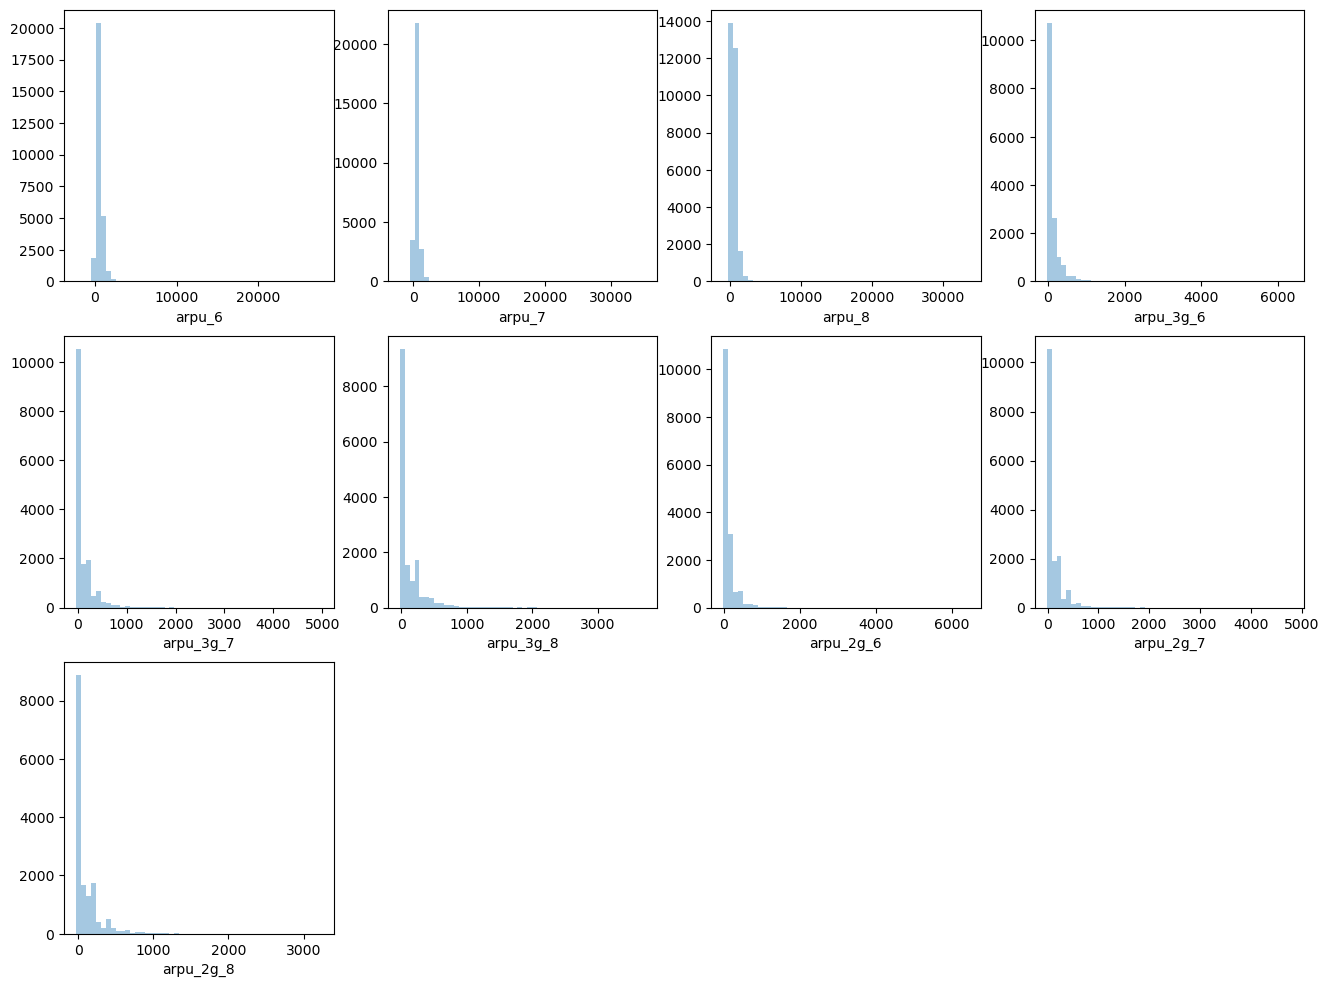

In [48]:
plt.figure(figsize=(16, 12))
arpu_cols = list(get_col(df_high_value, 'arpu'))
for col in arpu_cols:
    plt.subplot(3,4, arpu_cols.index(col) + 1)
    uni(df_high_value[col])

**3. onnet_mou and offnet_mou**

- Data right skewed, this indicates presence of outliers in the right.
- median of onnet mou ranges from 65 to 90, and has a decreasing trend from month 6 to 9
- median of onnet mou ranges from 175 to 230, and has a decreasing trend from month 6 to 9
- shows offnet mou is more than onnet

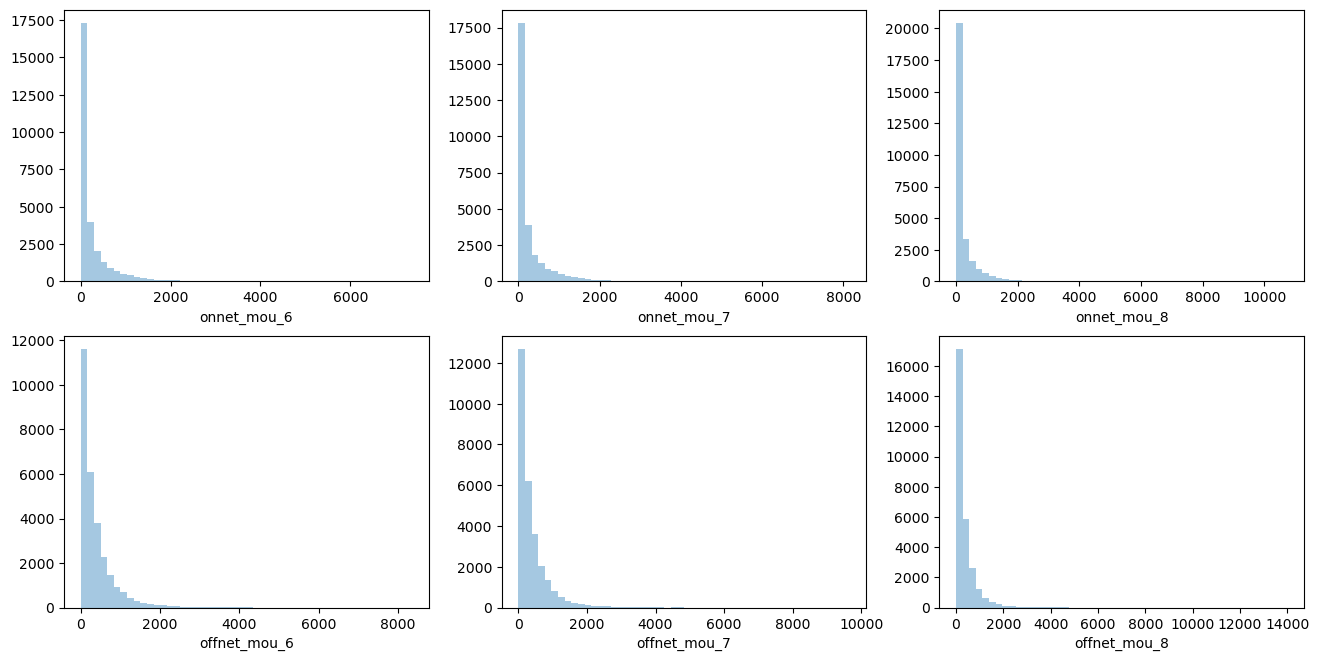

In [49]:
plt.figure(figsize=(16, 12))
uni_cols = list(get_col(df_high_value, 'net'))
for col in uni_cols:
    plt.subplot(3,3, uni_cols.index(col) + 1)
    uni(df_high_value[col])

**4. avg recharge amount columns**
- median of avg recharge amount ranges from 17 to 69
- average data recharge decreases from month 6 to 8

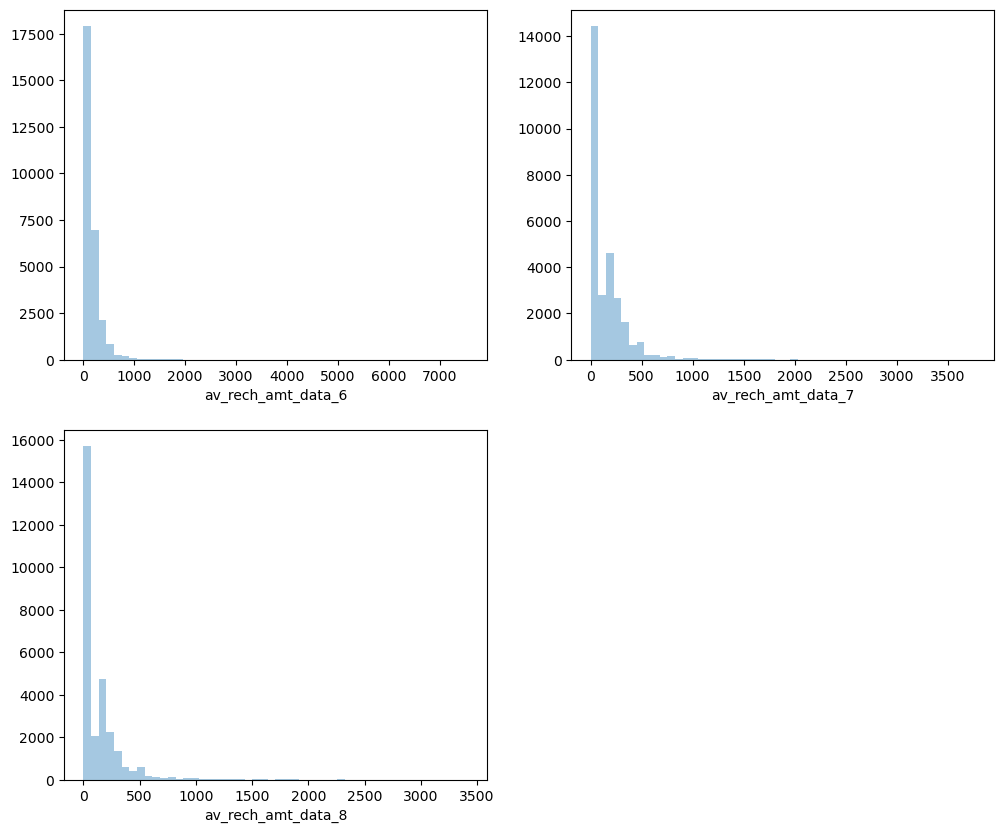

In [50]:
plt.figure(figsize=(12, 10))
uni_cols = list(get_col(df_high_value, 'av_rech_amt_data'))
for col in uni_cols:
    plt.subplot(2,2, uni_cols.index(col) + 1)
    uni(df_high_value[col])

### Bivariate Analysis

**1. churn vs aon**
- aon was lower for customers who churned than those who didn't

<AxesSubplot:xlabel='churn', ylabel='aon'>

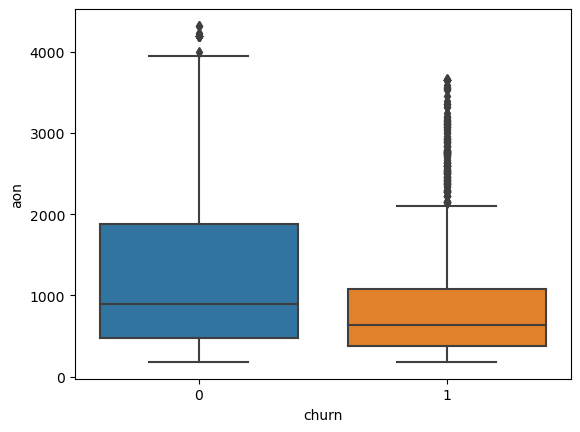

In [51]:
sns.boxplot(data=df_high_value, x='churn', y='aon')

**2. churn vs arpu columns**
- the diff column shows arpu gap increased significanly in the 8th month for customer who churned

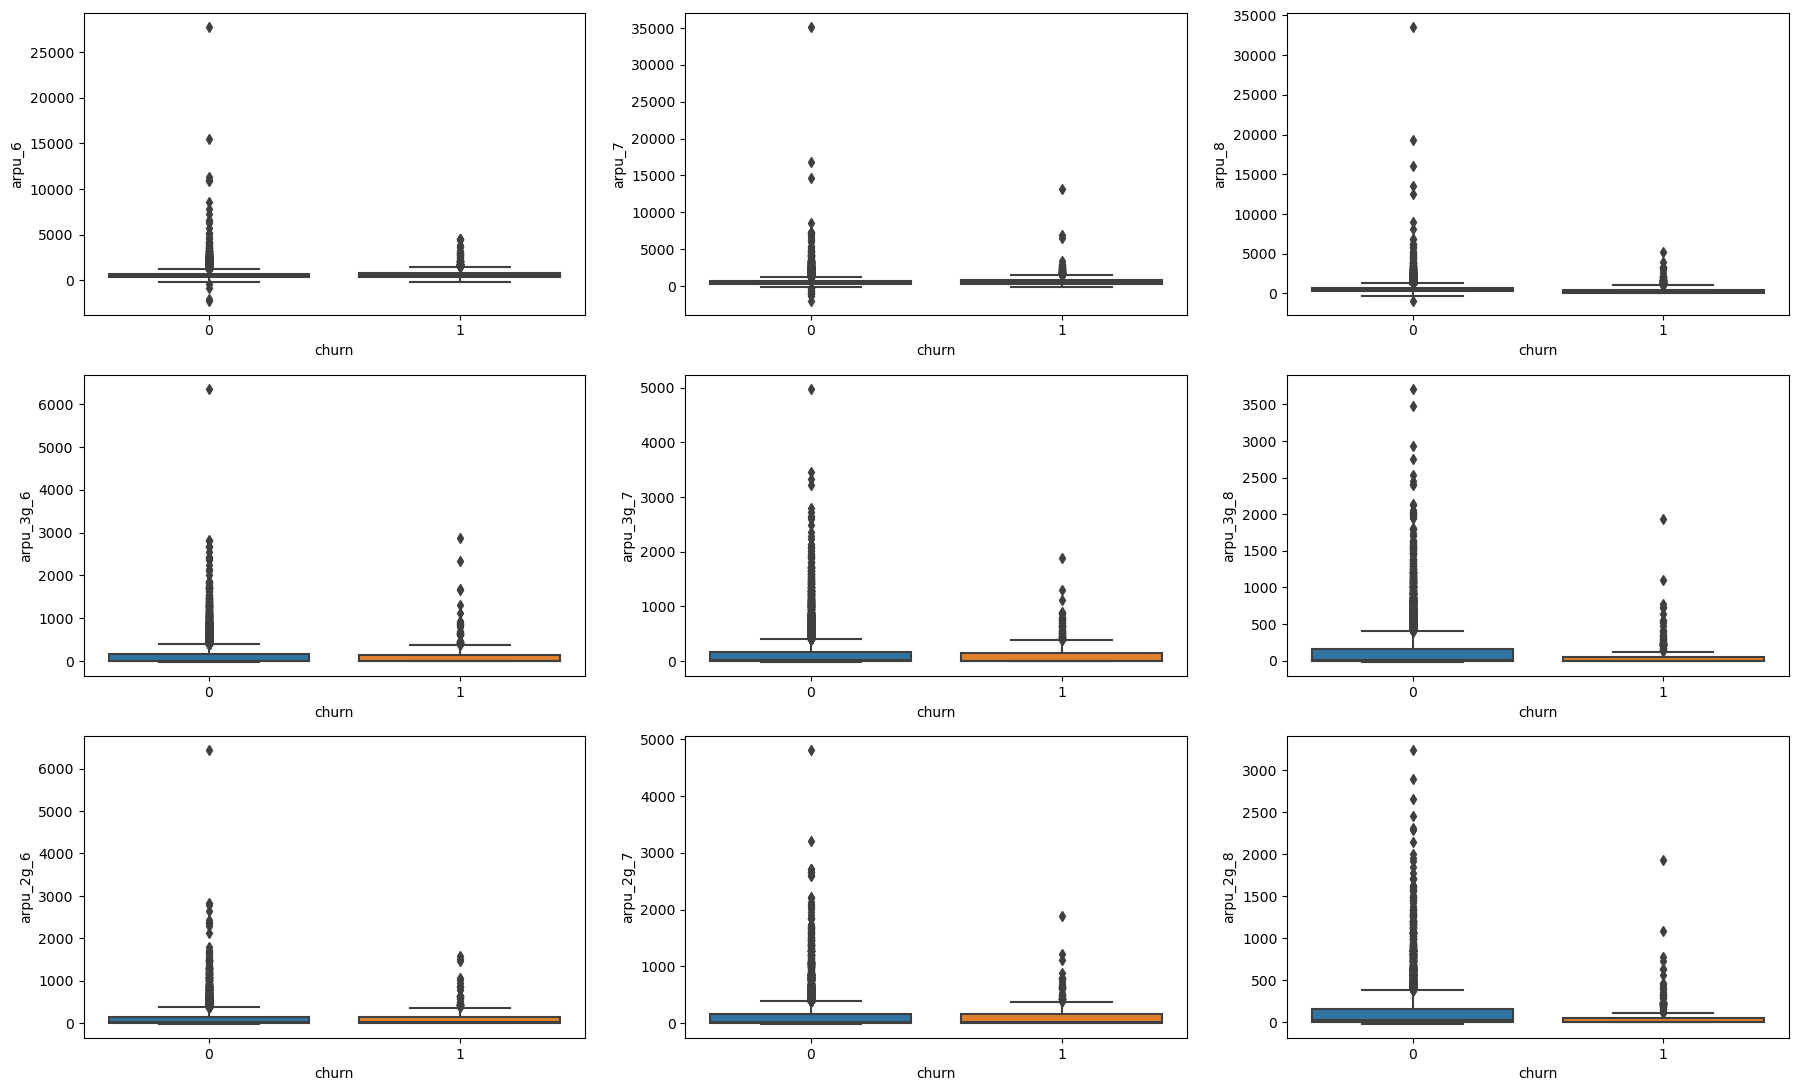

In [52]:
plt.figure(figsize=(22, 18))
cols = list(get_col(df_high_value, 'arpu'))
for col in cols:
    plt.subplot(4,3, cols.index(col) + 1)
    sns.boxplot(data=df_high_value, x='churn', y=col)

**3. churn vs fb_user columns**
- in the 8th month, it can be seen that customers who churned almost stopped recharging facebook packs

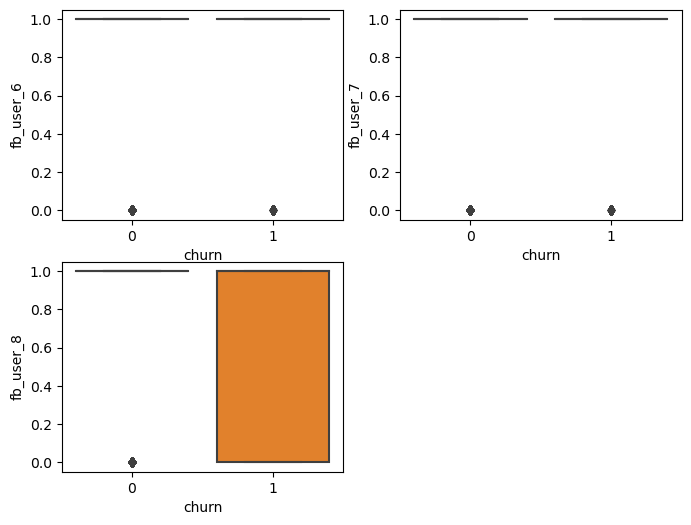

In [53]:
plt.figure(figsize=(8, 6))
cols = list(get_col(df_high_value, 'fb_user'))
for col in cols:
    plt.subplot(2,2, cols.index(col) + 1)
    sns.boxplot(data=df_high_value, x='churn', y=col)

**4. churn vs onnet_mou and offnet_mou**
- the diff column shows onnet_mou and offnet_mou gap increased significanly in the 8th month for customer who churned

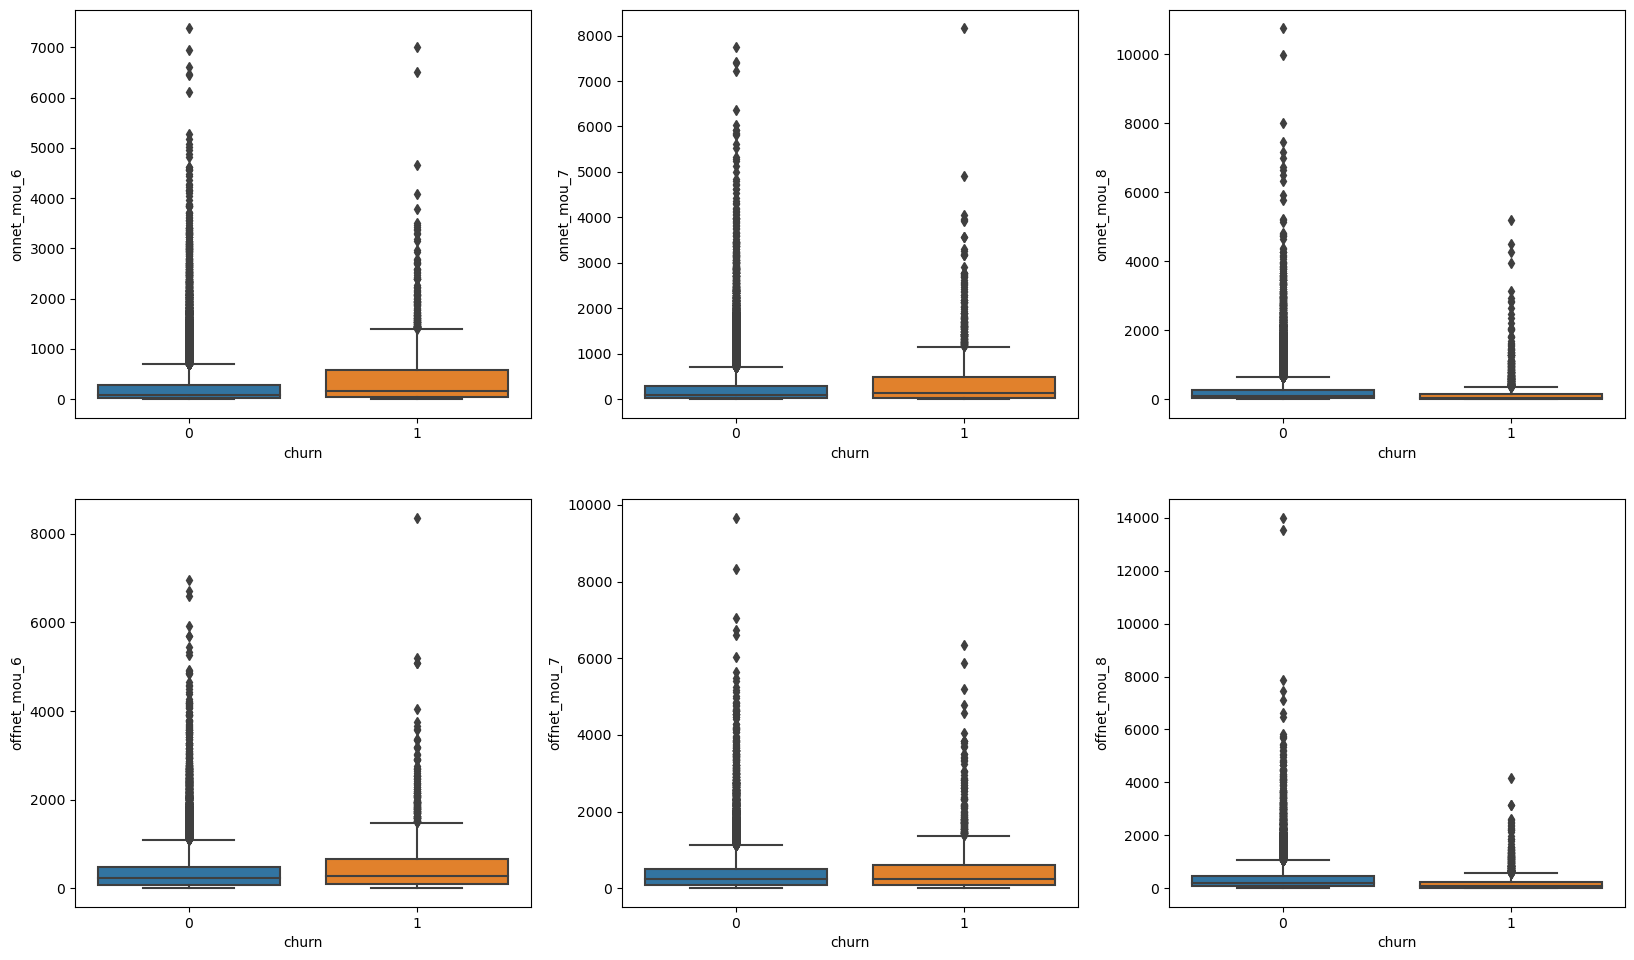

In [54]:
plt.figure(figsize=(20, 18))
cols = list(get_col(df_high_value, 'net'))
for col in cols:
    plt.subplot(3,3, cols.index(col) + 1)
    sns.boxplot(data=df_high_value, x='churn', y=col)

**5. av_rech_amt_data columns**
- It can be be observed that for the customers who churned had very low recharges in the 8th month as compared to 6th and 7th months

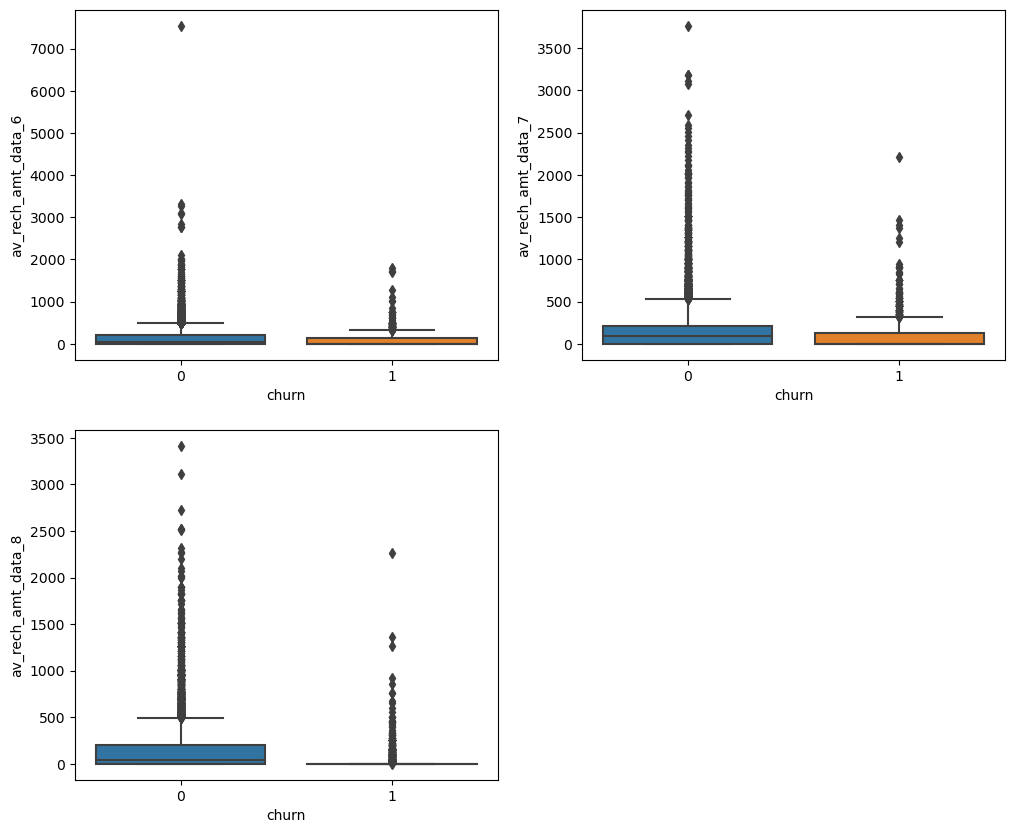

In [55]:
plt.figure(figsize=(12, 10))
cols = list(get_col(df_high_value, 'av_rech_amt_data'))

for col in cols:
    plt.subplot(2,2, cols.index(col) + 1)
    sns.boxplot(data=df_high_value, x='churn', y=col)

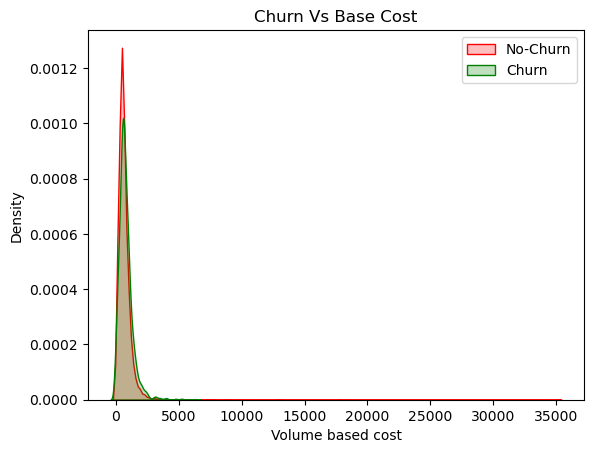

In [56]:
ax = sns.kdeplot(df_high_value.total_rech_amt_6[(df_high_value["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(df_high_value.total_rech_amt_6[(df_high_value["churn"] == 1)],
                ax =ax, color="Green", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')

ax.set_xlabel('Volume based cost')
ax.set_title('Churn Vs Base Cost')
plt.show()

In [57]:
#Get Correlation
corr = df_high_value.corr()

In [58]:
corr

mobile_number    arpu_6    arpu_7    arpu_8  \
mobile_number               1.000000  0.033922  0.025331  0.029794   
arpu_6                      0.033922  1.000000  0.717481  0.663516   
arpu_7                      0.025331  0.717481  1.000000  0.769991   
arpu_8                      0.029794  0.663516  0.769991  1.000000   
onnet_mou_6                 0.008875  0.343666  0.216187  0.160028   
onnet_mou_7                 0.003339  0.227770  0.315769  0.229720   
onnet_mou_8                 0.004306  0.200824  0.266403  0.339563   
offnet_mou_6                0.017339  0.516198  0.363625  0.296203   
offnet_mou_7                0.007464  0.356831  0.487917  0.376715   
offnet_mou_8                0.014245  0.307798  0.395255  0.517551   
roam_ic_mou_6               0.010610  0.120665  0.097828  0.094523   
roam_ic_mou_7              -0.002831  0.087266  0.092003  0.077961   
roam_ic_mou_8               0.004013  0.096381  0.091596  0.107180   
roam_og_mou_6               0.005198  0.191755  0.140239  0.136298   
roam_og_mou_7              -0.002480  0.151179  0.178974  0.143082   
roam_og_mou_8              -0.004525  0.132664  0.151464  0.197133   
loc_og_t2t_mou_6            0.046186  0.167727  0.104790  0.099814   
loc_og_t2t_mou_7            0.042936  0.132166  0.153287  0.128039   
loc_og_t2t_mou_8            0.042073  0.129936  0.131647  0.171527   
loc_og_t2m_mou_6            0.075415  0.336023  0.216487  0.215444   
loc_og_t2m_mou_7            0.073329  0.255962  0.296892  0.261309   
loc_og_t2m_mou_8            0.076617  0.231605  0.250557  0.341277   
loc_og_t2f_mou_6            0.048924  0.141450  0.110639  0.119485   
loc_og_t2f_mou_7            0.050274  0.119906  0.134593  0.132282   
loc_og_t2f_mou_8            0.054623  0.110673  0.118146  0.153675   
loc_og_t2c_mou_6           -0.013468  0.043907  0.007229  0.001678   
loc_og_t2c_mou_7           -0.014440  0.010183  0.035712  0.020016   
loc_og_t2c_mou_8           -0.008200  0.012218  0.029452  0.050109   
loc_og_mou_6                0.080696  0.331850  0.212962  0.209770   
loc_og_mou_7                0.077769  0.256770  0.297558  0.258272   
loc_og_mou_8                0.078728  0.236778  0.250443  0.335821   
std_og_t2t_mou_6           -0.017406  0.275172  0.171442  0.111331   
std_og_t2t_mou_7           -0.021753  0.170613  0.256618  0.176017   
std_og_t2t_mou_8           -0.018550  0.144774  0.216564  0.273414   
std_og_t2m_mou_6           -0.028791  0.302808  0.211375  0.132969   
std_og_t2m_mou_7           -0.032988  0.189435  0.305647  0.206397   
std_og_t2m_mou_8           -0.028930  0.151770  0.237757  0.318816   
std_og_t2f_mou_6            0.024769  0.067165  0.053703  0.057154   
std_og_t2f_mou_7            0.017535  0.055092  0.068891  0.067653   
std_og_t2f_mou_8            0.021313  0.046594  0.052332  0.067804   
std_og_mou_6               -0.030445  0.388018  0.257258  0.164615   
std_og_mou_7               -0.036385  0.242143  0.378028  0.257500   
std_og_mou_8               -0.031221  0.197700  0.302643  0.394677   
isd_og_mou_6               -0.003093  0.457902  0.439962  0.420557   
isd_og_mou_7               -0.002464  0.442803  0.514684  0.449198   
isd_og_mou_8               -0.003054  0.436984  0.461243  0.459524   
spl_og_mou_6               -0.020461  0.122160  0.069178  0.106161   
spl_og_mou_7               -0.022807  0.071615  0.110671  0.124927   
spl_og_mou_8               -0.016320  0.048491  0.064796  0.098935   
og_others_6                -0.006670  0.053351  0.017689  0.013991   
og_others_7                -0.001167  0.025597  0.026490  0.015724   
og_others_8                 0.000426  0.016231  0.017944  0.012098   
total_og_mou_6              0.017208  0.561058  0.376717  0.292783   
total_og_mou_7              0.007673  0.383829  0.533079  0.400405   
total_og_mou_8              0.013271  0.327044  0.428133  0.554323   
loc_ic_t2t_mou_6            0.030104  0.080442  0.044504  0.047662   
loc_ic_t2t_mou_7            0.026

In [59]:
# sns.heatmap(corr,annot=True) 

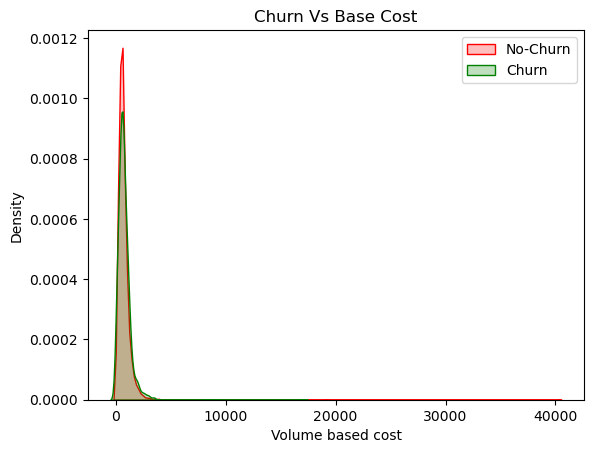

In [60]:
ax = sns.kdeplot(df_high_value.total_rech_amt_7[(df_high_value["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(df_high_value.total_rech_amt_7[(df_high_value["churn"] == 1)],
                ax =ax, color="Green", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')

ax.set_xlabel('Volume based cost')
ax.set_title('Churn Vs Base Cost')
plt.show()

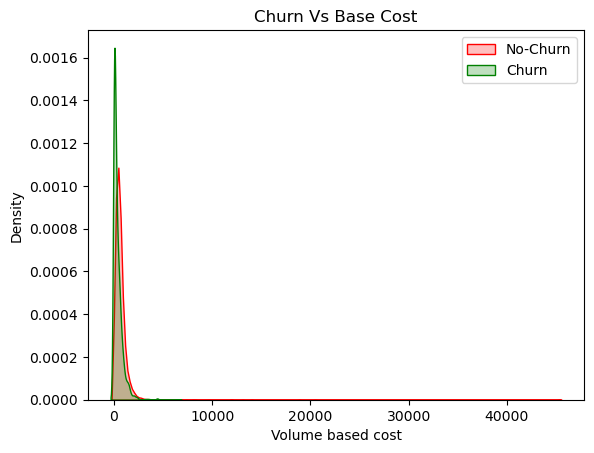

In [61]:
ax = sns.kdeplot(df_high_value.total_rech_amt_8[(df_high_value["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(df_high_value.total_rech_amt_8[(df_high_value["churn"] == 1)],
                ax =ax, color="Green", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')

ax.set_xlabel('Volume based cost')
ax.set_title('Churn Vs Base Cost')
plt.show()

In [62]:
df_high_value.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   
33     7000149764   977.020  2362.833   409.230         0.00         0.00   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
21        85.14        757.93        896.68        983.39           0.00   
23        33.58         85.41         89.36        205.89           0.00   
33         0.00          0.00          0.00          0.00           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00           0.00   
33           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   
33              0.00              0.00              0.00              0.00   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   
33              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   
33              0.00               0.0               0.0              0.56   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   
33          0.00          0.00          0.00              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   
33              0.00              0.00              0.00              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00              0.00              0.00   
23          

# Derive New Features

In [63]:
df_high_value.info(verbose=1
                  )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Data columns (total 163 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    mobile_number             int64         
 1    arpu_6                    float64       
 2    arpu_7                    float64       
 3    arpu_8                    float64       
 4    onnet_mou_6               float64       
 5    onnet_mou_7               float64       
 6    onnet_mou_8               float64       
 7    offnet_mou_6              float64       
 8    offnet_mou_7              float64       
 9    offnet_mou_8              float64       
 10   roam_ic_mou_6             float64       
 11   roam_ic_mou_7             float64       
 12   roam_ic_mou_8             float64       
 13   roam_og_mou_6             float64       
 14   roam_og_mou_7             float64       
 15   roam_og_mou_8             float64       
 16   loc_og_t2t_mou_6          float64     

In [64]:
# create a new colulmn, which would be average  of 6th & 7th months
# lets first create list of columns belonging to 6th and 7th months
col_list = df_high_value.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()

print (df_high_value.shape)
# lets take the average now
for idx, col in enumerate(col_list.unique()):
    if(df_high_value.dtypes[col+"_6"] != 'datetime64[ns]'):
        avg_col_name = "avg_"+col+"_av67" # lets create the column name dynamically
        col_6 = col+"_6"
        col_7 = col+"_7"
        df_high_value[avg_col_name] = (df_high_value[col_6]  + df_high_value[col_7])/ 2

(28504, 163)


In [65]:
# we dont need columns from which we have derived new features, we will drop those columns
print ("dimension of the updated dataset after creating dervied features:",df_high_value.shape)
col_to_drop = df_high_value.filter(regex='_6|_7').columns
df_high_value.drop(col_to_drop, axis=1, inplace=True)

print("dimension of the dataset after dropping un-necessary columns:",df_high_value.shape)

dimension of the updated dataset after creating dervied features: (28504, 213)
dimension of the dataset after dropping un-necessary columns: (28504, 109)


In [66]:
# lets now conevrt AON in months
df_high_value['aon_mon'] = df_high_value['aon']/30
df_high_value.drop('aon', axis=1, inplace=True)
df_high_value['aon_mon'].head()

7     26.733333
8     10.500000
21    24.000000
23    20.133333
33    44.266667
Name: aon_mon, dtype: float64

Text(0.5, 1.0, 'Tenure Graph')

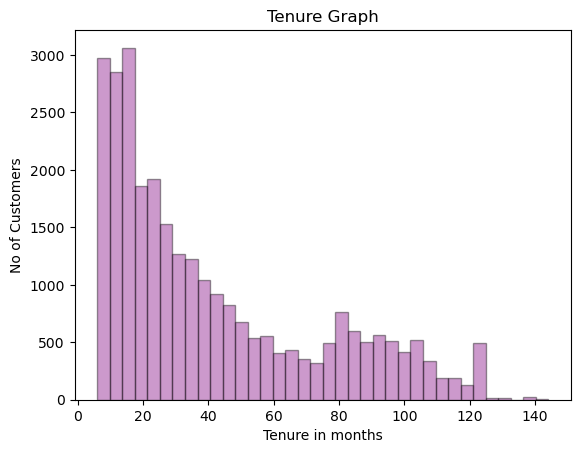

In [67]:
ax = sns.distplot(df_high_value['aon_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'purple', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 10})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure in months')
ax.set_title('Tenure Graph')
# below graph simply shows the tenure of the customers

In [68]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
df_high_value['tenure_range'] = pd.cut(df_high_value['aon_mon'], tn_range, labels=tn_label)
df_high_value['tenure_range'].head()

7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
33        2-5 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

<AxesSubplot:>

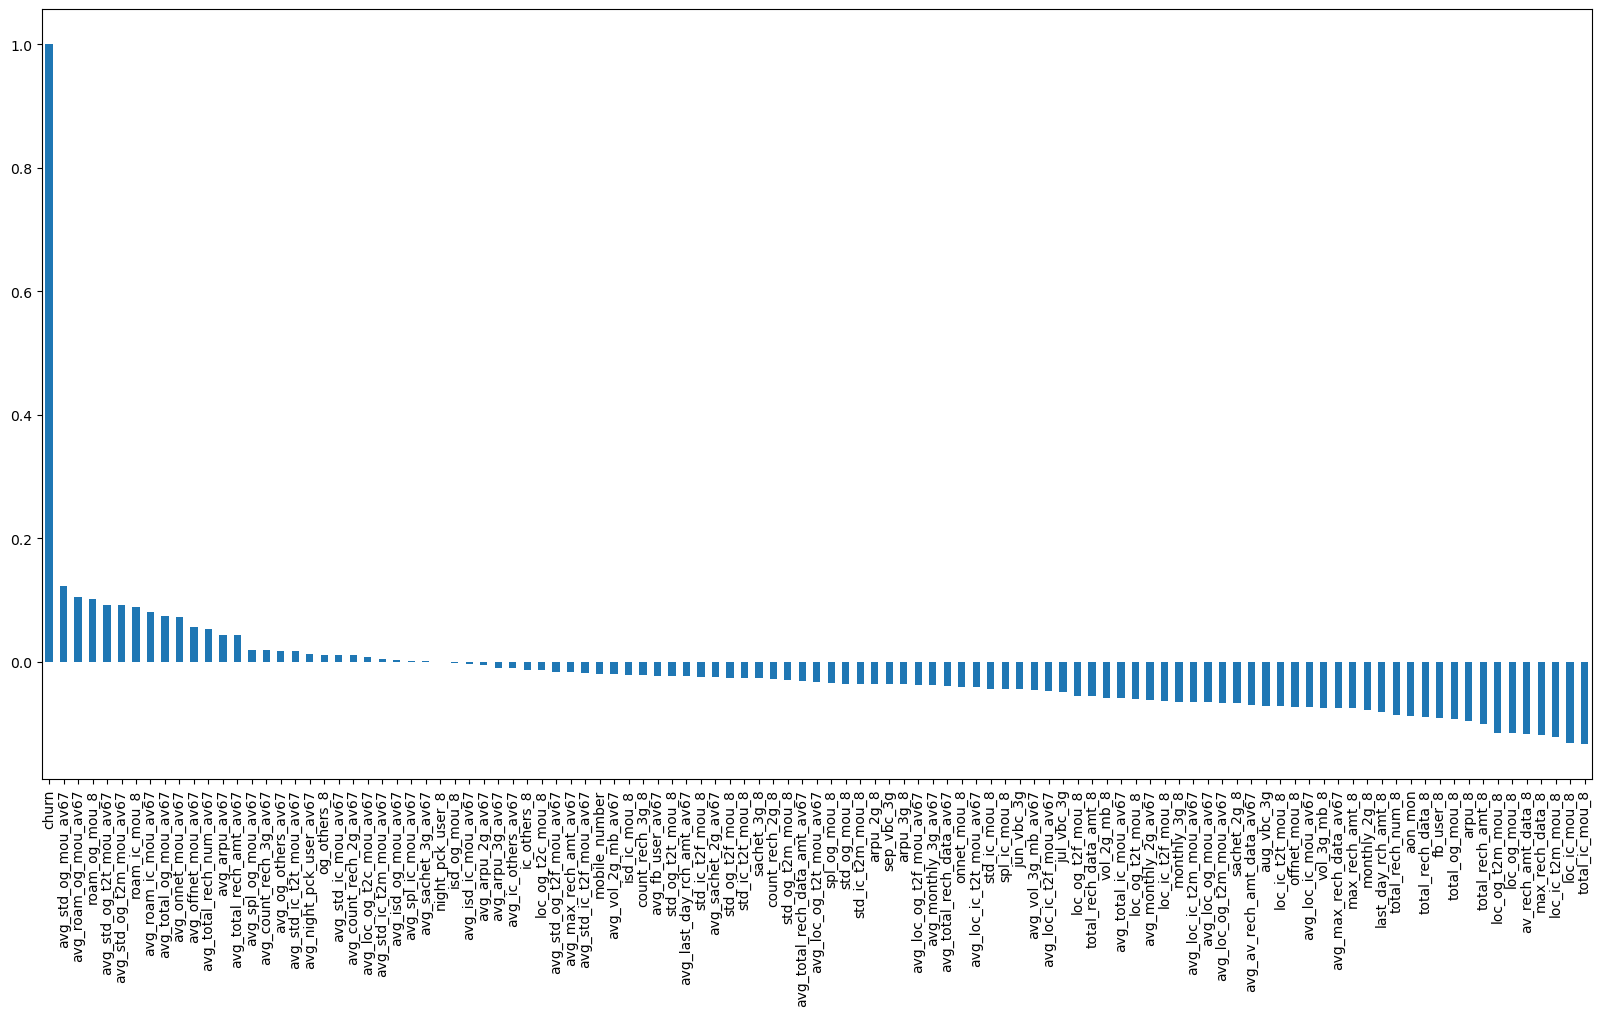

In [69]:
# lets check correlation of churn with other columns
plt.figure(figsize=(20,10))
df_high_value.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

# observations : 
# 1. Avg Outgoing Calls & calls on romaning for 6 & 7th months are positively correlated with churn. 
# 2. Avg Revenue, No. Of Recharge for 8th month has negative correlation with churn.

<AxesSubplot:xlabel='total_rech_num_8', ylabel='arpu_8'>

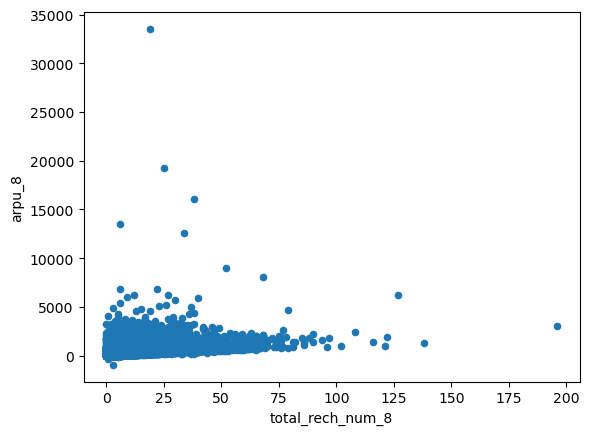

In [70]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
df_high_value[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')

<AxesSubplot:xlabel='aon_mon', ylabel='avg_arpu_av67'>

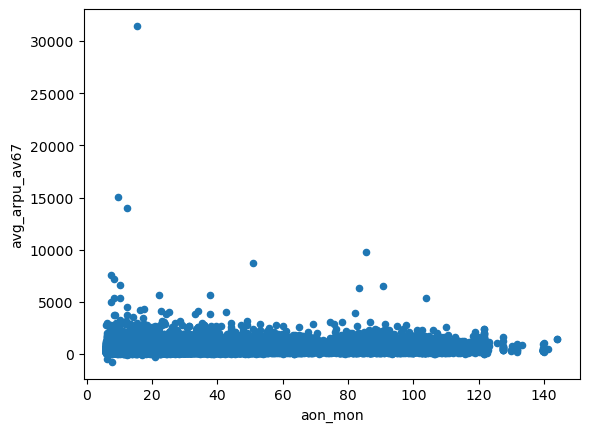

In [71]:
# plot between tenure and revenue
df_high_value[['aon_mon', 'avg_arpu_av67']].plot.scatter(x = 'aon_mon',
                                                              y='avg_arpu_av67')

<AxesSubplot:xlabel='churn', ylabel='aon_mon'>

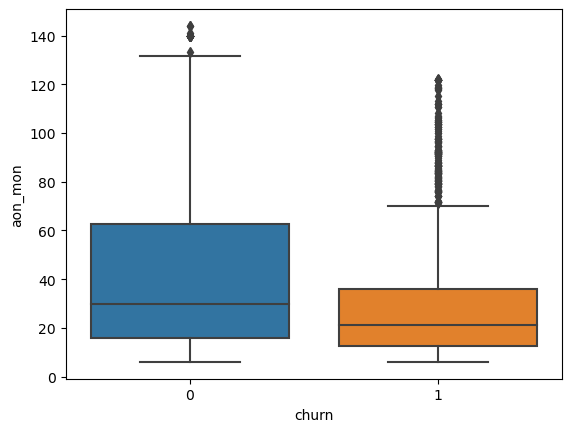

In [72]:
sns.boxplot(x = df_high_value.churn, y = df_high_value.aon_mon)

# Drop some unused Columns

In [73]:
df_high_value.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Data columns (total 110 columns):
 #    Column                        Dtype         
---   ------                        -----         
 0    mobile_number                 int64         
 1    arpu_8                        float64       
 2    onnet_mou_8                   float64       
 3    offnet_mou_8                  float64       
 4    roam_ic_mou_8                 float64       
 5    roam_og_mou_8                 float64       
 6    loc_og_t2t_mou_8              float64       
 7    loc_og_t2m_mou_8              float64       
 8    loc_og_t2f_mou_8              float64       
 9    loc_og_t2c_mou_8              float64       
 10   loc_og_mou_8                  float64       
 11   std_og_t2t_mou_8              float64       
 12   std_og_t2m_mou_8              float64       
 13   std_og_t2f_mou_8              float64       
 14   std_og_mou_8                  float64       
 15   isd_og_mou_8     

In [74]:
#Dropping date field as we already utilized this field
df_high_value.drop(['date_of_last_rech_8','date_of_last_rech_data_8'],axis=1,inplace=True)

In [75]:
#Dropping Tenure_range also
df_high_value.drop(['tenure_range'],axis=1,inplace=True)

In [76]:
df_high_value.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Data columns (total 107 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    mobile_number                 int64  
 1    arpu_8                        float64
 2    onnet_mou_8                   float64
 3    offnet_mou_8                  float64
 4    roam_ic_mou_8                 float64
 5    roam_og_mou_8                 float64
 6    loc_og_t2t_mou_8              float64
 7    loc_og_t2m_mou_8              float64
 8    loc_og_t2f_mou_8              float64
 9    loc_og_t2c_mou_8              float64
 10   loc_og_mou_8                  float64
 11   std_og_t2t_mou_8              float64
 12   std_og_t2m_mou_8              float64
 13   std_og_t2f_mou_8              float64
 14   std_og_mou_8                  float64
 15   isd_og_mou_8                  float64
 16   spl_og_mou_8                  float64
 17   og_others_8                   float64
 18   tota

## Replace NaN values with 0 before PCA

In [77]:
from numpy import nan
for i in df_high_value.columns:
    df_high_value[i] = df_high_value[i].replace(nan,0)

In [78]:
#Creating 
df_new = df_high_value

In [79]:
df_new.shape

(28504, 107)

In [80]:
df_new.head()

mobile_number    arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
7      7000701601  3171.480        52.29        325.91          31.64   
8      7001524846   137.362        35.08        136.48           0.00   
21     7002124215   637.760        85.14        983.39           0.00   
23     7000887461   366.966        33.58        205.89           0.00   
33     7000149764   409.230         0.00          0.00           0.00   

    roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
7           38.06             40.28            162.28             53.23   
8            0.00             12.49             50.54              0.00   
21           0.00             23.34            104.81              1.58   
23           0.00             33.58            148.56              0.00   
33           0.00              0.00              0.00              0.00   

    loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  \
7               0.00        255.79             12.01             49.14   
8               7.15         63.04             22.58             75.69   
21              0.00        129.74             61.79            876.99   
23             17.71        182.14              0.00             39.61   
33              0.56          0.00              0.00              0.00   

    std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
7              16.68         77.84         10.01          6.50          0.0   
8               0.00         98.28          0.00         10.23          0.0   
21              0.00        938.79          0.00          0.00          0.0   
23              0.00         39.61          0.00         17.71          0.0   
33              0.00          0.00          0.00          0.56          0.0   

    total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  \
7           350.16             27.31            121.19             39.53   
8           171.56              0.31             15.48              0.00   
21         1068.54             19.54            129.16             10.39   
23          239.48             76.64            146.84              0.71   
33            0.56              2.45             37.93              0.16   

    loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
7         188.04             30.39            141.33             22.21   
8          15.79              0.10              0.65              0.00   
21        159.11              0.18            101.74              0.00   
23        224.21             13.38             43.91              0.00   
33         40.54              0.05              0.86              0.13   

    std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
7         193.94          428.74           0.0         31.59        15.14   
8           0.75           16.54           0.0          0.00         0.00   
21        101.93          261.04           0.0          0.00         0.00   
23         57.29          298.33           0.0          3.74        13.06   
33          1.04           41.79           0.0          0.00         0.20   

    total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
7                  7              3638            1580                 779   
8                 14               120              30                  10   
21                27               718              50                  50   
23                 4               439             179                   0   
33                 1               455             455                 455   

    total_rech_data_8  max_rech_data_8  count_rech_2g_8  count_rech_3g_8  \
7                 0.0              0.0              0.0              0.0   
8                 3.0             23.0              3.0              0.0   
21                0.0              0.0              0.0              0.0   
23                2.0            179.0              0.0 

In [81]:
df_high_value.head()

mobile_number    arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
7      7000701601  3171.480        52.29        325.91          31.64   
8      7001524846   137.362        35.08        136.48           0.00   
21     7002124215   637.760        85.14        983.39           0.00   
23     7000887461   366.966        33.58        205.89           0.00   
33     7000149764   409.230         0.00          0.00           0.00   

    roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
7           38.06             40.28            162.28             53.23   
8            0.00             12.49             50.54              0.00   
21           0.00             23.34            104.81              1.58   
23           0.00             33.58            148.56              0.00   
33           0.00              0.00              0.00              0.00   

    loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  \
7               0.00        255.79             12.01             49.14   
8               7.15         63.04             22.58             75.69   
21              0.00        129.74             61.79            876.99   
23             17.71        182.14              0.00             39.61   
33              0.56          0.00              0.00              0.00   

    std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
7              16.68         77.84         10.01          6.50          0.0   
8               0.00         98.28          0.00         10.23          0.0   
21              0.00        938.79          0.00          0.00          0.0   
23              0.00         39.61          0.00         17.71          0.0   
33              0.00          0.00          0.00          0.56          0.0   

    total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  \
7           350.16             27.31            121.19             39.53   
8           171.56              0.31             15.48              0.00   
21         1068.54             19.54            129.16             10.39   
23          239.48             76.64            146.84              0.71   
33            0.56              2.45             37.93              0.16   

    loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
7         188.04             30.39            141.33             22.21   
8          15.79              0.10              0.65              0.00   
21        159.11              0.18            101.74              0.00   
23        224.21             13.38             43.91              0.00   
33         40.54              0.05              0.86              0.13   

    std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
7         193.94          428.74           0.0         31.59        15.14   
8           0.75           16.54           0.0          0.00         0.00   
21        101.93          261.04           0.0          0.00         0.00   
23         57.29          298.33           0.0          3.74        13.06   
33          1.04           41.79           0.0          0.00         0.20   

    total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
7                  7              3638            1580                 779   
8                 14               120              30                  10   
21                27               718              50                  50   
23                 4               439             179                   0   
33                 1               455             455                 455   

    total_rech_data_8  max_rech_data_8  count_rech_2g_8  count_rech_3g_8  \
7                 0.0              0.0              0.0              0.0   
8                 3.0             23.0              3.0              0.0   
21                0.0              0.0              0.0              0.0   
23                2.0            179.0              0.0 

# PCA

In [82]:
#Split Predictor and target Variable
y = df_new.pop('churn')
X = df_new.drop(['mobile_number'],axis=1)

In [83]:
X.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
7   3171.480        52.29        325.91          31.64          38.06   
8    137.362        35.08        136.48           0.00           0.00   
21   637.760        85.14        983.39           0.00           0.00   
23   366.966        33.58        205.89           0.00           0.00   
33   409.230         0.00          0.00           0.00           0.00   

    loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
7              40.28            162.28             53.23              0.00   
8              12.49             50.54              0.00              7.15   
21             23.34            104.81              1.58              0.00   
23             33.58            148.56              0.00             17.71   
33              0.00              0.00              0.00              0.56   

    loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
7         255.79             12.01             49.14             16.68   
8          63.04             22.58             75.69              0.00   
21        129.74             61.79            876.99              0.00   
23        182.14              0.00             39.61              0.00   
33          0.00              0.00              0.00              0.00   

    std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
7          77.84         10.01          6.50          0.0          350.16   
8          98.28          0.00         10.23          0.0          171.56   
21        938.79          0.00          0.00          0.0         1068.54   
23         39.61          0.00         17.71          0.0          239.48   
33          0.00          0.00          0.56          0.0            0.56   

    loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
7              27.31            121.19             39.53        188.04   
8               0.31             15.48              0.00         15.79   
21             19.54            129.16             10.39        159.11   
23             76.64            146.84              0.71        224.21   
33              2.45             37.93              0.16         40.54   

    std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
7              30.39            141.33             22.21        193.94   
8               0.10              0.65              0.00          0.75   
21              0.18            101.74              0.00        101.93   
23             13.38             43.91              0.00         57.29   
33              0.05              0.86              0.13          1.04   

    total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
7           428.74           0.0         31.59        15.14                 7   
8            16.54           0.0          0.00         0.00                14   
21          261.04           0.0          0.00         0.00                27   
23          298.33           0.0          3.74        13.06                 4   
33           41.79           0.0          0.00         0.20                 1   

    total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  \
7               3638            1580                 779                0.0   
8                120              30                  10                3.0   
21               718              50                  50                0.0   
23               439             179                   0                2.0   
33               455             455                 455                1.0   

    max_rech_data_8  count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  \
7               0.0              0.0              0.0                 0.0   
8              23.0              3.0              0.0                69.0   
21              0.0              0.0              0.0                 0.0   
23            179.0           

### Scaling - Standard Scaler

In [84]:
#Scaling the Data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [85]:
X_scaled[:5,:5]

array([[ 5.28296718, -0.41472461, -0.05007046,  0.24583007,  0.16155988],
       [-0.77623658, -0.45181401, -0.440133  , -0.17217253, -0.19370497],
       [ 0.22306979, -0.34392932,  1.30377168, -0.17217253, -0.19370497],
       [-0.31771208, -0.45504668, -0.29720822, -0.17217253, -0.19370497],
       [-0.2333099 , -0.52741519, -0.72116417, -0.17217253, -0.19370497]])

In [86]:
#Test Train Split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,train_size=0.7,random_state=1)

In [87]:
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (19952, 105)
Dimension of X_test: (8552, 105)


## Using SMOTE to handle Class Imbalance

In [91]:
#Using SMOTE to correct Data Imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_trn,y_trn = sm.fit_resample(X_train,y_train)

In [92]:
X_trn.shape

(37666, 105)

### As we can see that SMOTE increased the size of the data by adding Skewed Data values

In [93]:
y_trn.shape

(37666,)

In [94]:
#Importing PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=100)



In [95]:
#apply PCA on training data
pca.fit(X_trn)

PCA(random_state=100)

In [96]:
#get PCA Components
pca.components_

array([[-7.63517014e-03, -8.88788621e-02, -7.22810643e-02, ...,
         2.09262389e-01,  1.66816937e-01,  3.36010167e-02],
       [ 2.44099221e-01,  1.26287456e-01,  1.79518900e-01, ...,
        -1.39316965e-02,  4.51350985e-03,  5.69377941e-02],
       [ 2.63036425e-02, -9.60706769e-02, -2.56577486e-02, ...,
        -5.30883837e-02, -1.04648338e-01,  6.11738691e-02],
       ...,
       [-4.99019356e-16, -2.00540430e-15, -1.16645532e-15, ...,
         6.67829285e-17, -6.32676161e-17, -9.16263309e-18],
       [ 0.00000000e+00, -4.06730568e-15, -4.00544469e-15, ...,
        -5.72489151e-18,  4.24681339e-17,  3.48362512e-17],
       [-0.00000000e+00, -2.95461622e-15, -4.24214718e-15, ...,
        -1.08330712e-16, -1.32550068e-16, -2.97271324e-17]])

In [97]:
pca.explained_variance_ratio_

array([1.22025808e-01, 9.74377273e-02, 6.57008014e-02, 6.33745569e-02,
       4.81493876e-02, 4.54500059e-02, 3.77365405e-02, 3.61038427e-02,
       2.95992637e-02, 2.60944997e-02, 2.32695105e-02, 2.20217355e-02,
       1.93179283e-02, 1.80088794e-02, 1.78680153e-02, 1.53535544e-02,
       1.41422163e-02, 1.37141369e-02, 1.32605393e-02, 1.26473013e-02,
       1.22951450e-02, 1.16208044e-02, 1.12880321e-02, 1.04693784e-02,
       1.02214225e-02, 9.29691050e-03, 8.94969580e-03, 8.51721495e-03,
       8.23390656e-03, 7.93269365e-03, 7.40631444e-03, 7.21914014e-03,
       7.11806618e-03, 7.02400130e-03, 6.73247078e-03, 6.62676825e-03,
       6.54636904e-03, 6.33500224e-03, 6.12830798e-03, 5.85084481e-03,
       5.58801223e-03, 5.47041801e-03, 5.28096278e-03, 5.05397979e-03,
       4.86769686e-03, 4.35368740e-03, 3.98536295e-03, 3.48926413e-03,
       3.16901094e-03, 3.04657469e-03, 2.94540089e-03, 2.93272730e-03,
       2.85346675e-03, 2.67762830e-03, 2.47939402e-03, 2.43766273e-03,
      

In [98]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [99]:
var_cumu[60]

0.9783345220328962

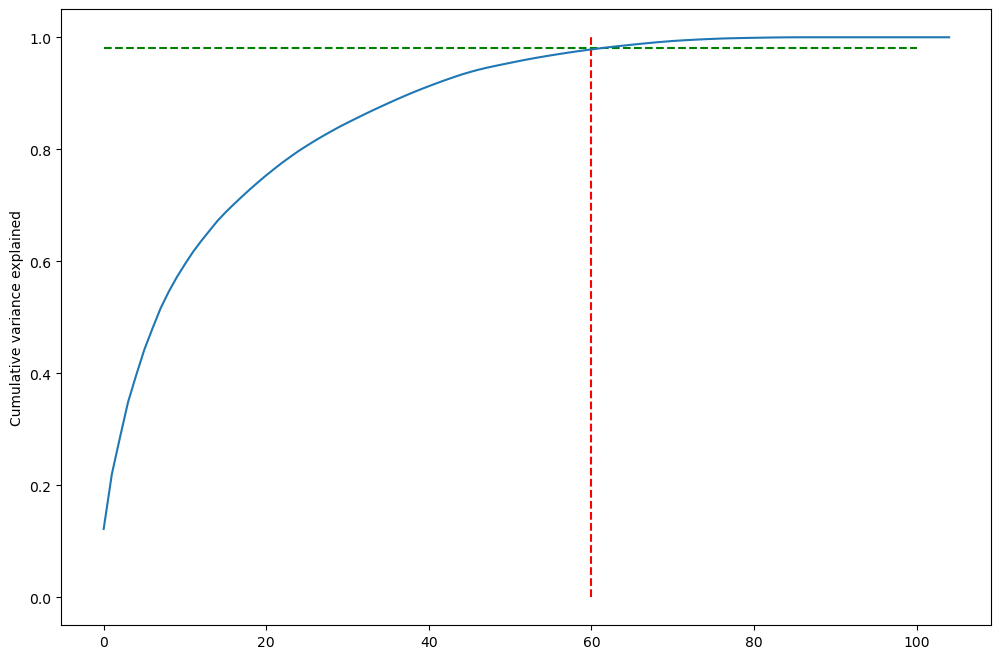

In [100]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=60, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.98, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

## From PCA we identifed that out of 105 columns we can achieve 98% of the variance by using just 60 columns

In [101]:
#Perform PCA again with 60 Columns
pca_final = PCA(n_components=60)

In [102]:
df_train_pca_60 = pca_final.fit_transform(X_trn)

In [103]:
df_train_pca_60.shape

(37666, 60)

In [104]:
corrmat = np.corrcoef(df_train_pca_60.transpose())

In [105]:
corrmat.shape

(60, 60)

<AxesSubplot:>

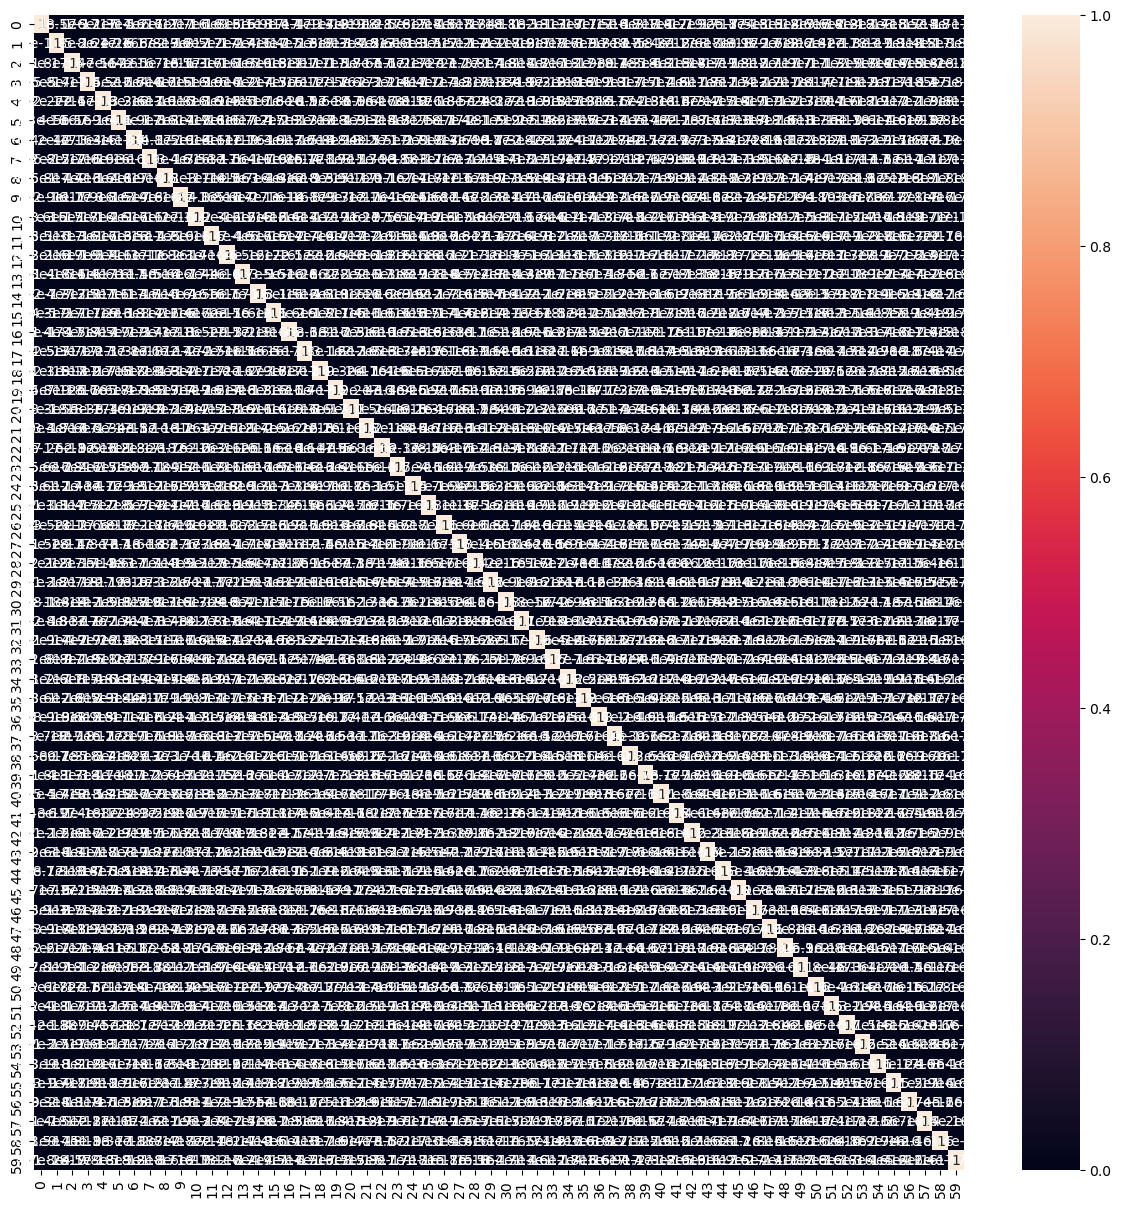

In [106]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

## We can clearly see that there is no correlation between the variables

In [107]:
#Apply the PCA to test
df_test_pca_60 = pca_final.transform(X_test)

In [108]:
df_test_pca_60.shape

(8552, 60)

# Lets build Models and Evaluate Metrics 

## Model 1 : Logistic regression

In [109]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix

lr = LogisticRegression()
model = lr.fit(df_train_pca_60,y_trn)
#Making prediction on the test data
y_pred = model.predict(df_test_pca_60)

pred_probs_test = model.predict_proba(df_test_pca_60)[:,1]
print(" AUC : "+"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test)))
print("Accuracy with 60 PCAs: ",accuracy_score(y_test,y_pred))
print("Confusion Matrix :",confusion_matrix(y_test,y_pred))

 AUC : 0.87
Accuracy with 60 PCAs:  0.8034377923292797
Confusion Matrix : [[6489 1586]
 [  95  382]]


In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.80      0.89      8075
           1       0.19      0.80      0.31       477

    accuracy                           0.80      8552
   macro avg       0.59      0.80      0.60      8552
weighted avg       0.94      0.80      0.85      8552



## Logistic Regression:
- Accuracy - 80%
- AUC - 0.87

## Model 2:  Decision Tree 

In [111]:
# lets create a decision tree now
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

# apply SMOTE to tackle class imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_trn,y_trn = sm.fit_resample(X_train,y_train)
print(X_trn.shape)
print(y_trn.shape)

(37666, 105)
(37666,)


In [112]:
X_trn

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0       201.946000    11.190000     44.680000      29.040000      55.880000   
1       179.218000   156.910000     68.180000       0.000000       0.000000   
2      2051.947000   572.360000    853.460000       3.950000       7.330000   
3       732.165000   130.260000     90.280000      19.880000       0.000000   
4         0.000000     0.000000      0.000000       0.000000       0.000000   
...            ...          ...           ...            ...            ...   
37661    35.165772     0.000000     11.430264       0.000000       0.460642   
37662     0.309186     0.525616      0.000000       0.888655       0.525616   
37663   286.981165    11.137412     17.460007       0.000000       0.000000   
37664   712.994081  1223.955945    115.179140      52.568825     280.838321   
37665   603.821820   480.353287    780.950122       0.096035       2.247923   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0              0.000000          0.000000          0.000000          0.000000   
1             29.310000         65.580000          0.800000          0.000000   
2            443.340000        766.930000         28.660000          0.000000   
3             48.360000         61.590000          0.000000          7.610000   
4              0.000000          0.000000          0.000000          0.000000   
...                 ...               ...               ...               ...   
37661          0.000000          0.000000          0.000000          0.000000   
37662          0.000000          0.000000          0.000000          0.000000   
37663          1.070548          1.719767          0.000000          0.000000   
37664         40.809483         62.724958          0.479620          0.000000   
37665          9.875848          8.925214          0.615333          9.816567   

       loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
0          0.000000          0.000000          0.000000          0.000000   
1         95.690000        127.590000          1.790000          0.000000   
2       1238.940000        129.010000         50.530000          0.000000   
3        109.960000         81.890000          7.290000          0.000000   
4          0.000000          0.000000          0.000000          0.000000   
...             ...               ...               ...               ...   
37661      0.000000          0.000000          0.000000          0.000000   
37662      0.000000          0.000000          0.000000          0.000000   
37663      2.792965         10.064214         15.737590          0.000000   
37664    104.019057        920.003935         34.253771          0.000000   
37665     19.426395        469.619133        760.548378          0.215189   

       std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
0          0.000000           0.0      0.000000          0.0        0.000000   
1        129.390000           0.0      0.000000          0.0      225.090000   
2        179.540000           0.0      0.000000          0.0     1418.490000   
3         89.190000           0.0     21.380000          0.0      220.540000   
4          0.000000           0.0      0.000000          0.0        0.000000   
...             ...           ...           ...          ...             ...   
37661      0.000000           0.0     11.363977          0.0       11.363977   
37662      0.000000           0.0      0.000000          0.0        0.000000   
37663     25.804454           0.0      1.764815          0.0       30.364884   
37664    954.267706           0.0      0.000000          0.0     1058.296763   
37665   1230.394478           0.0     11.847297          0.0     1261.678170   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
0              0.000000          0.000000          0.000000      0.000000   
1             40.260000        113.990000         

In [113]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [114]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [115]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.9491780272654371


array([[18610,   223],
       [  791,   328]])

In [116]:
print("Accuracy :" , accuracy_score(y_test, y_test_pred))
print("Confusion Matrix" , confusion_matrix(y_test, y_test_pred))


Accuracy : 0.9514733395696913
Confusion Matrix [[7987   88]
 [ 327  150]]


# Lets do some Hyperparameter Tuning

## Model 3 - Decision Tree with HPT

In [117]:
dt = DecisionTreeClassifier(random_state=42)

In [118]:
#Import the Cross validation 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [119]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 4)

In [120]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=folds, n_jobs=-1, verbose=1, scoring = "roc_auc")

In [121]:
grid_search

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='roc_auc', verbose=1)

In [122]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 1.43 s, sys: 350 ms, total: 1.78 s
Wall time: 39.1 s


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='roc_auc', verbose=1)

In [123]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.363814      0.021769         0.013755        0.002591   
1       0.342118      0.020442         0.012353        0.003423   
2       0.313663      0.006447         0.007820        0.000309   
3       0.278055      0.012145         0.008948        0.001246   
4       0.264935      0.013608         0.008486        0.000768   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                      5   
1            gini               2                     10   
2            gini               2                     20   
3            gini               2                     50   
4            gini               2                    100   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.749336   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.749336   
2  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.749336   
3  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.749336   
4  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.749201   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.774576           0.735465           0.758311         0.754422   
1           0.774576           0.735465           0.758311         0.754422   
2           0.774576           0.735465           0.758311         0.754422   
3           0.774576           0.735465           0.758311         0.754422   
4           0.774434           0.735465           0.758311         0.754353   

   std_test_score  rank_test_score  
0        0.014200               39  
1        0.014200               39  
2        0.014200               39  
3        0.014200               39  
4        0.014161               43

In [124]:
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
39       1.322442      0.054029         0.010438        0.000597   
13       0.889102      0.038487         0.011198        0.000792   
14       0.872911      0.035830         0.011121        0.000452   
49       1.613347      0.142283         0.006967        0.000483   
44       1.911040      0.128697         0.010716        0.000545   

   param_criterion param_max_depth param_min_samples_leaf  \
39         entropy               5                    100   
13            gini               5                     50   
14            gini               5                    100   
49         entropy              20                    100   
44         entropy              10                    100   

                                               params  split0_test_score  \
39  {'criterion': 'entropy', 'max_depth': 5, 'min_...           0.862439   
13  {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.868051   
14  {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.864026   
49  {'criterion': 'entropy', 'max_depth': 20, 'min...           0.864561   
44  {'criterion': 'entropy', 'max_depth': 10, 'min...           0.859737   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
39           0.870220           0.867324           0.869844         0.867457   
13           0.866627           0.864214           0.867491         0.866596   
14           0.867973           0.864043           0.869717         0.866440   
49           0.864751           0.875591           0.859857         0.866190   
44           0.858907           0.877287           0.859100         0.863758   

    std_test_score  rank_test_score  
39        0.003103                1  
13        0.001465                2  
14        0.002483                3  
49        0.005771                4  
44        0.007817                5

In [125]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=100,
                       random_state=42)

In [126]:
dt_best = grid_search.best_estimator_

In [127]:
dt_best

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=100,
                       random_state=42)

In [128]:
#Generic Function for Model Evaluation
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))
    print("Classification Reports:", classification_report(y_test,dt_classifier.predict(X_test)))

In [129]:
evaluate_model(dt_best)

Train Accuracy : 0.9486267040898155
Train Confusion Matrix:
[[18553   280]
 [  745   374]]
--------------------------------------------------
Test Accuracy : 0.9501870907390084
Test Confusion Matrix:
[[7958  117]
 [ 309  168]]
Classification Reports:               precision    recall  f1-score   support

           0       0.96      0.99      0.97      8075
           1       0.59      0.35      0.44       477

    accuracy                           0.95      8552
   macro avg       0.78      0.67      0.71      8552
weighted avg       0.94      0.95      0.94      8552



In [130]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8075
           1       0.59      0.35      0.44       477

    accuracy                           0.95      8552
   macro avg       0.78      0.67      0.71      8552
weighted avg       0.94      0.95      0.94      8552



# Decision Tree gave an Accuracy of 95%

# Model 4: Random Forest

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
rf = RandomForestClassifier(n_jobs=-1,random_state=42, n_estimators=10, max_depth=3)

In [133]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, n_jobs=-1, random_state=42)

In [134]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1608637542)

In [135]:
evaluate_model(rf)

Train Accuracy : 0.9474238171611868
Train Confusion Matrix:
[[18749    84]
 [  965   154]]
--------------------------------------------------
Test Accuracy : 0.9490177736202058
Test Confusion Matrix:
[[8041   34]
 [ 402   75]]
Classification Reports:               precision    recall  f1-score   support

           0       0.95      1.00      0.97      8075
           1       0.69      0.16      0.26       477

    accuracy                           0.95      8552
   macro avg       0.82      0.58      0.61      8552
weighted avg       0.94      0.95      0.93      8552



# We got accuracy of 94% without any hyper parameter Tuning


# Hyper Parameter Tuning
# Model 5 : Random Forest with HPT

In [136]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)

In [137]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 4)

In [138]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=folds, n_jobs=-1, verbose=1, scoring = "roc_auc")

In [139]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits


KeyboardInterrupt: 

In [140]:
rf_best = grid_search.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
rf_best

In [ ]:
evaluate_model(rf_best)

In [ ]:
# Random Forest - feature Importance
rf_best.feature_importances_

In [ ]:
imp_features = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [ ]:
imp_features.sort_values(by="Imp", ascending=False)

## Feature Importance Plot

In [ ]:
# df_new.drop('churn',axis=1,inplace=True)
df_telecom = df_new.drop(['mobile_number'],axis=1)
features = df_telecom.columns.values
df_telecom = pd.DataFrame(scaler.transform(df_telecom))
df_telecom.columns = features

importances = rf.feature_importances_
weights = pd.Series(importances,
                 index=df_telecom.columns.values)
weights.sort_values()[-15:].plot(kind = 'barh')

In [ ]:
weights.sort_values(ascending=False)[:15]

## We got accuracy of 95.2% with Hyper parameter Tuning

### Observations
- Reduction in number and duration incoming calls, outgoing calls (local, std, same network, other network) is a strong indicator of churn
- Reduction in recharge amount is again a strong indicator of churn
- Cutomers with tenure less than 4 yrs are more likely to churn
- Random Forest produced the best prediction results followed by Decision Tree

### Bussiness Suggestions
- If there is reduction in the number and duration incoming and outgoing calls or if recharge amount decreases significantly, reach out to customer and understand their problems like network quality issues or cost of usage, even feedback about why they are leaving can be used for further analysis
- Churning customers will most likely switch to a different network, create recharge packs that are competitive
- Can provide Good Offers for Customers who are most likely to Churn
- Sort problems which are causing the highest customers to churn, focus on them first
- Keep track of ways which worked to retain customers, use them for others

Note: 
-  We also tried XGBoost , however it was taking more time and was not giving expected results so we are not using it
- However please find below the tried XGBoost approach

# XGBoost Regression

In [ ]:
# #Machine Learning
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split

# import xgboost as xgb

In [ ]:
# xgb_reg = xgb.XGBRegressor(n_jobs = -1) # default paramters
# xgb_reg.get_params()

In [ ]:
# X_trn

In [ ]:
# xgb_reg.fit(X_trn, y_trn)

In [ ]:
# pred = xgb_reg.predict(X_test)

# r2score = r2_score(pred,y_test)

In [ ]:
# pred

In [ ]:
# print("R2 Score for XGBoost : ",r2score)

## Hyper Parameter Tuning

In [ ]:
# # A parameter grid for XGBoost
# params = {
#         'n_estimators' : [100, 200, 500, 750], # no of trees 
#         'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
#         'min_child_weight': [1, 5, 7, 10],
#         'gamma': [0.1, 0.5, 1, 1.5, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5, 10, 12]
#         }

# folds = 3

# param_comb = 100

# random_search = RandomizedSearchCV(xgb_reg, param_distributions=params, n_iter=param_comb, n_jobs=-1, cv=3, verbose=3, random_state=42)



In [ ]:
# %time
# random_search.fit(X_train, y_train)

In [ ]:
# pred_hpt = random_search.predict(X_test)

# r2score = r2_score(pred_hpt,y_test)

In [ ]:
# pred_hpt

In [ ]:
# r2score